# Project 2 - Ames Housing Data and Kaggle Challenge

_Ang Sheng Jun DSI14_  

---
### Problem Statement 
Create a regression model based on the Ames Housing Dataset that best predict the price of a house at sale. Limite the number of predictor features to within 25 to 30 features.

### Contents:
- [Importing Libraries](#Importing-Libraries)
- [Load the Data](#Load-the-Data)
- [Basic EDA and Data Cleaning](#Basic-EDA-and-Data-Cleaning)
- [Dealing with Null values](#Dealing-with-Null-values)
- [Data cleaning for Test dataset](#Data-cleaning-for-Test-dataset)
- [Selecting Variable as Predictors of Saleprice](#Selecting-Variable-as-Predictors-of-Saleprice)
- [Feature Engineering 1 (year variables)](#Feature-Engineering-1-(year-variables)) 
- [Correlation of Numerical Variables to Target](#Correlation-of-Numerical-Variables-to-Target)
- [Feature Engineering 2 (Dummy Variables; Outliers)](#Feature-Engineering-2-(Dummy-Variables;-Outliers))
- [Modeling & Evaluation (Model 1)](#Modeling-&-Evaluation-(Model-1))
- [Feature Engineering 3 (Categorical Ordinal Variables)](#Feature-Engineering-3-(Categorical-Ordinal-Variables))
- [Correlation (Encoded Ordinal Variables to Target)](#Correlation-(Encoded-Ordinal-Variables-to-Target))
- [Modeling & Evaluation (Model 2)](#Modeling-&-Evaluation-(Model-2))
- [Feature Engineering 4 (Categorical Nominal Variables)](#Feature-Engineering-4-(Categorical-Nominal-Variables))
- [Modeling & Evaluation (Model 3 & 4)](#Modeling-&-Evaluation-(Model-3-&-4))
- [Feature Engineering 5 (Test Data)](#Feature-Engineering-5-(Test-Data))
- [Model Prep (Train/test split, Scaling)](#Model-Prep-(Train/test-split,-Scaling))
- [Predicting SalePrice from Test Data](#Predicting-SalePrice-from-Test-Data)
- [Business Recommendations](#Business-Recommendations)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('fivethirtyeight')

%matplotlib inline

### Load the Data
Training dataset is from __[DSI-US-6 Project 2 Regression Challenge](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)__. The dataset has some cell values that have `NA` to represent the absence of data for that particular cell. Therefore, read in .csv file with `keep_default_na=False`.

In [2]:
# Read in data
"""Assign data as df."""
df = pd.read_csv('../datasets/train.csv',keep_default_na=False)
"""Enable all columns to display."""
pd.set_option('display.max_columns', None)
# to reset columns, use pd.reset_option(“max_columns”)
"""Display first five rows of data."""
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


### Basic EDA and Data Cleaning

In [3]:
# Change column headers format
"""Change column names to lowercase, fill empty space with underscore."""
df.columns = df.columns.str.lower().str.replace(' ', '_')
"""Display updated column names, limit to first three rows"""
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000


In [4]:
# Replace missing values with NaN
df.replace("",np.nan,inplace=True)

In [5]:
# Overview of datatypes for loaded dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2051 non-null   int64 
 1   pid              2051 non-null   int64 
 2   ms_subclass      2051 non-null   int64 
 3   ms_zoning        2051 non-null   object
 4   lot_frontage     1721 non-null   object
 5   lot_area         2051 non-null   int64 
 6   street           2051 non-null   object
 7   alley            2051 non-null   object
 8   lot_shape        2051 non-null   object
 9   land_contour     2051 non-null   object
 10  utilities        2051 non-null   object
 11  lot_config       2051 non-null   object
 12  land_slope       2051 non-null   object
 13  neighborhood     2051 non-null   object
 14  condition_1      2051 non-null   object
 15  condition_2      2051 non-null   object
 16  bldg_type        2051 non-null   object
 17  house_style      2051 non-null   

Our training dataset is 2051 rows by 81 columns. Comparing against the data dictionary, several columns are read in as object type due to `NaN` values. We can identify this by looking at the returned values of `non-null count`.
For example, `lot_frontage` is read in as `object` datatype as some of its cells contain non-numerical values. We will convert the datatype of these columns to float (various methods are used).

#### Convert object  datatype to float

In [6]:
# Change the following columns of object type to float
"""Change object to numeric using pd.numeric()."""
df['lot_frontage'] = pd.to_numeric(df['lot_frontage'])

"""Change object to float using astype()."""
df['mas_vnr_area'] = df['mas_vnr_area'].astype(float)
df['bsmtfin_sf_1'] = df['bsmtfin_sf_1'].astype(float)

"""Change object to float using lambda function."""
df['bsmtfin_sf_2'] = df['bsmtfin_sf_2'].map(lambda val: float(val))

"""Change object to float using apply()."""
df[['bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_cars','garage_area']] =\
df[['bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_cars','garage_area']]\
.apply(pd.to_numeric,axis=1)

In [7]:
# Review object datatype to float conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

`ms_subclass` is parsed as an `int` datatype. From data dict, we know it is a categorical (nominal) variable. We shall convert this to a `str` datatype as part of datacleaning for one hot encoding later on.

#### Convert datatype of `ms_subclass`

In [8]:
"""Print datatype before converting."""
print(df['ms_subclass'].dtypes)
"""Convert integer to str datatype"""
df['ms_subclass'] = df['ms_subclass'].astype(str)
"""Print datatype after converting."""
print(df['ms_subclass'].dtypes)

int64
object


In [9]:
# Summary Statistics
df.describe()

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


No negative values observed. There is significant interval between the maximum and 75percentile value for some of the variable values. This could indicate presence of outliers. For example, `mas_vnr_area`: Masonry veneer area, has a significant difference between 75thpercentile (161 sq_ft) and max. (1600 sq_ft). Other variables with similar observations include:
- `bsmtfin_sf_1`: basement type 1 finished area
- `bsmtfin_sf_2`: basement type 2 finished area
- `bsmt_unf_sf`: unfinished basement area
- `total_bsmt_sf`: total basement area 
- `1st_flr_sf`: First floor area
- `2nd_flr_sf`: Second floor area
- `low_qual_fin_sf`: Low quality finished area (all floors)
- `gr_liv_area`: Above grade (ground) living area
- `garage_area`
- `wood_deck_sf`: Wood deck area
- `open_porch_sf`: Open porch area
- `enclosed_porch`: Enclosed porch area
- `3ssn_porch`: Three season porch area
- `screen_porch`: Screen porch area
- `pool_area`
- `misc_value`: value of miscellaneous features
- `saleprice`

`garage_year_built` has a very high maximum value (2207). We will review this for the root cause.

#### Review and clean error value in `garage_yr_blt`

In [10]:
# Identify the row with max. year 2207 
df.loc[df['garage_yr_blt'] == 2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NA,NA,NA,0,9,2007,New,267300


In [11]:
"""housing was built in 2006, remodded in 2007 and sold in 2007"""
"""Plausible year for  garage_yr_blt (year=2207)"""
# Update the year to 2007
df.loc[1699,'garage_yr_blt'] = 2007
df.loc[1699,'garage_yr_blt']

2007.0

#### Investigate range of max. values observed from summary statistics

In [12]:
# Identify rows for total_bsmt_sf with max. 6610 sq ft
df.loc[df['total_bsmt_sf'] == 6110]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000


From the cell values, we can deduce the `total_bsmt_sf` is sum of all basement areas. There is no evidence of the cell value being an erroneous value.

In [13]:
# Identify rows for low_qual_fin_sf with max. 1064 sq ft
df.loc[df['low_qual_fin_sf'] == 1064]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
828,661,535381040,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1313.0,1313.0,GasA,TA,Y,SBrkr,1313,0,1064,2377,0.0,0.0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954.0,Unf,2.0,528.0,TA,TA,Y,0,0,432,0,0,0,NA,NA,NA,0,6,2009,WD,142900


Similarly for in terms of quantitative measure for housing living area, the `gr_liv_area` is the total of 1st_flr_sf,	2nd_flr_sf	and low_qual_fin_sf. No indication of erroneous value.

In [14]:
# Review of max. values for wood_deck_sf and corresponding porch areas
"""We are interested in the upper range areas for porch areas."""
"""1_000 sq ft used as a threshold to pare down the number of rows for review."""
df.loc[df['wood_deck_sf'] < 1_000].head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000


Prelim analysis is that area for `wood_deck_sf` and other outdoor porch feature areas are independent from each other.

#### Cleaning sale_type value

From the review of cell values in the training dataset, cell values of `sale_type` has an additional space (e.g. 'WD '). We shall format the cell value. 

In [15]:
# Review unique cell values for sale_type
df['sale_type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

In [16]:
# Remove the space for 'WD' value
df['sale_type'] = df['sale_type'].str.strip()
"""Review formatted cell value."""
df['sale_type'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI', 'ConLw'],
      dtype=object)

### Dealing with Null values

In [17]:
#Return list of columns with null values, sorted in ascending order
null_col = df.isna().sum().sort_values()
null_col[null_col>0]

bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_qual           1
bsmtfin_sf_1        1
garage_qual         1
bsmtfin_sf_2        1
garage_area         1
garage_cars         1
garage_finish       1
bsmtfin_type_1      1
bsmt_cond           1
garage_cond         1
bsmt_full_bath      2
bsmt_half_bath      2
bsmtfin_type_2      2
bsmt_exposure       4
mas_vnr_area       22
mas_vnr_type       22
garage_yr_blt     114
lot_frontage      330
dtype: int64

From the list of columns with null values, we can further look at it by cluster. Let's start with columns with one null value.

In [18]:
# Define function to check for other basement-related columns with null
def row_null_id(column):
    return df.loc[df[column].isnull()]

In [19]:
# Identify the null value row for bsmt_unf_sf
row_null_id('bsmt_unf_sf')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


Similarly, identify the null value row for the rest of the `bsmt` related columns.

In [20]:
row_null_id('total_bsmt_sf')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [21]:
row_null_id('bsmt_qual')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [22]:
row_null_id('bsmtfin_sf_1')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [23]:
row_null_id('bsmtfin_sf_2')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [24]:
row_null_id('bsmt_cond')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [25]:
row_null_id('bsmtfin_type_1')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


A comparison through the rest ('bsmt_qual', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmt_cond', 'bsmtfin_type_1') converges on single row indexed 1327. We could drop this particular row, since it constitute a small percentage of overall observations (1 out of 2051).

We next review columns with two null values.

In [26]:
# Identify rows with null values in bsmt_half_bath
row_null_id('bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [27]:
# Identify rows with null values in bsmt_full_bath
row_null_id('bsmt_full_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


For row 616, from `bstmt_qual` = NA, we can deduce this particular housing has no basement. So we can replace the NaN values for 'bsmt_full_bath' and 'bsmt_half_bath' as 0 (referencing the data dict).

In [28]:
# Review datatype
df['bsmt_full_bath'].dtypes

dtype('float64')

In [29]:
# Replace 'bsmt_full_bath' at index 616 to 0.0
df.loc[616, 'bsmt_full_bath'] = 0.0

In [30]:
# Replace 'bsmt_half_bath' at index 616 to 0.0
df.loc[616, 'bsmt_half_bath'] = 0.0

In [31]:
# Check null replacement for basement-bath related columns at index 616 done
"""We do not expect to see row indexed 616 returned."""
row_null_id('bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [32]:
# Identify rows with NaN values in bsmtfin_type_2
row_null_id('bsmtfin_type_2')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


For row 1147, there is basement2 as indicated by its area from the cell value in `bsmtfin_sf_2`. We could impute a mode for this row (categorical variable).

In [33]:
# Most occurring basement finish type 2 rating
df['bsmtfin_type_2'].mode()

0    Unf
dtype: object

In [34]:
# Impute NaN value and review
"""Return the value before imputation."""
print(df.loc[1147,'bsmtfin_type_2'])
"""Imputate NaN with mode value."""
df['bsmtfin_type_2'].fillna('Unf',inplace=True)
"""Review the value after imputation."""
print(df.loc[1147,'bsmtfin_type_2'])

nan
Unf


We note that this will update the `NaN` value under `bsmtfin_type_2` for row 1327 as well. However, there are still other cells along row 1327 we can leverage to remove it. 

In [35]:
# Identify rows with null values in bsmt_exposure column
row_null_id('bsmt_exposure')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,Unf,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


For rows 1456, 1547, 1997, there is basement as indicated by bsmt_qual. We could impute a mode for bsmt_exposure for these rows (categorical variable).

In [36]:
# Most occurring basement exposure rating
df['bsmt_exposure'].mode()

0    No
dtype: object

In [37]:
# Impute NaN value and review
df['bsmt_exposure'].fillna('No',inplace=True)
# Review imputation
df.loc[1456,'bsmt_exposure']

'No'

Again, this will update the `NaN` value for `bsmt_exposure` in row 1327, but are `NaN` values in other columns (e.g. `bsmtfin_sf_1`) we can leverage to drop the row.

Next review garage-related columns with one null value.

In [38]:
# Identify row with NaN value in garage_qual
row_null_id('garage_qual')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [39]:
# Identify row with NaN value in garage_area
row_null_id('garage_area')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [40]:
# Identify row with NaN value in garage_cars
row_null_id('garage_cars')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [41]:
# Identify row with NaN value in garage_finish
row_null_id('garage_finish')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [42]:
# Identify row with NaN value in garage_cond
row_null_id('garage_cond')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


The NaN values belong to a single row indexed 1712. We couldn't deduce if there is a garage from data in the other supporting columns (e.g. `garage_qual`). We will drop this row.

Next review the rows with NaN value for `mas_vnr_area` and `mas_vnr_type`.

In [43]:
# Identify row with NaN value in mas_vnr_area
row_null_id('mas_vnr_area')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,200

In [44]:
# Identify row with NaN value in mas_vnr_type
row_null_id('mas_vnr_type')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,200

NaN values belong to the same 22 rows for these two columns. From data dict, we can deduce the NaN values are due to the absence of masonary veneer for these properties. Let's impute `mas_vnr_type` as `None` and `mas_vnr_area` as `0.0` for these NaN values.

In [45]:
# Review and impute for mas_vnr_area
print(df.loc[22,'mas_vnr_area'])
df['mas_vnr_area'].fillna(0.0,inplace=True)
# Review imputation
df.loc[22,'mas_vnr_area']

nan


0.0

In [46]:
# Review and impute for mas_vnr_type
print(df.loc[22,'mas_vnr_type'])
df['mas_vnr_type'].fillna('None',inplace=True)
# Review imputation
df.loc[22,'mas_vnr_type']

nan


'None'

Next review the rows with `NaN`values for `garage_yr_blt`.

In [47]:
# Identify rows with NaN values for garage_yr_blt
row_null_id('garage_yr_blt')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,133,0,0,0,NA,NA,NA,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,200,26,0,0,0,0,NA,NA,NA,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,30,0,0,0,0,NA,NA,NA,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,0,176,0,0,NA,NA,NA,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,144,0,0,0,NA,NA,NA,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NA,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,128,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,23,0,0,0,NA,NA,NA,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,0,0,0,0,0,NA,NA,NA,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,

From `garage_type` information, we can deduce these `NaN` values in `garage_yr_blt` are due to absence of a garage. 114 observations comprise ~5% of total 2051 observations. We lose signifcant observations if we choose to just drop these rows. We could replace these with 0.0 to represent the absence of a garage. For regression, we will need to be mindful of this imputation aspect, if we are to use this variable later on. One mitigation is to use other correlated variables in place of `garage_yr_blt`. This will depend on the correlation analysis later on.

In [48]:
# Review and impute for garage_yr_blt
"""Pick the first row indexed 28 to review"""
print(df.loc[28,'garage_yr_blt'])
df['garage_yr_blt'].fillna(0.0,inplace=True)
# Review imputation
df.loc[28,'garage_yr_blt']

nan


0.0

Review `NaN` vlaues for `lot_frontage`.

In [49]:
# Identify rows with NaN values for lot_frontage
row_null_id('lot_frontage')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1963.0,RFn,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,Av,Rec,1110.0,Unf,0.0,734.0,1844.0,GasA,Gd,Y,SBrkr,1844,0,0,1844,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969.0,RFn,2.0,540.0,TA,TA,Y,0,73,216,0,0,0,NA,NA,NA,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,NA,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297.0,Rec,68.0,1203.0,1568.0,GasA,TA,Y,SBrkr,2156,0,0,2156,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2.0,508.0,Gd,TA,Y,0,80,0,290,0,0,NA,NA

From data dict, `lot_frontage` refers to the linear feet of street connected to property. From `street` information, we can deduce there is in fact, `lot_frontage` for these `NaN` values. Observing the potential presence of outliers from summary statistics for `lot_frontage`, we use the `median` value for `lot_frontage` to impute `NaN` values. Also 330 rows is a significant proportion of the total range of 2051 rows of observations.

In [50]:
# Return median value for lot_frontage
df['lot_frontage'].median()

68.0

In [51]:
# Review and impute for 'lot_frontage'
"""Pick first row indexed 0 to review"""
print(df.loc[0,'lot_frontage'])
df['lot_frontage'].fillna(68.0,inplace=True)
# Review imputation
df.loc[0,'lot_frontage']

nan


68.0

In [52]:
# Review progress on NaN value treatment
"""Return columns with NaN, sorted by ascending no. of NaN values."""
null_col = df.isna().sum().sort_values()
null_col[null_col>0]

garage_qual       1
bsmtfin_sf_2      1
bsmt_unf_sf       1
total_bsmt_sf     1
bsmt_cond         1
bsmt_qual         1
bsmtfin_type_1    1
bsmt_half_bath    1
garage_finish     1
garage_cars       1
bsmt_full_bath    1
garage_cond       1
garage_area       1
bsmtfin_sf_1      1
dtype: int64

In [53]:
# Drop rows with NaN values
"""There should be 2051-2 rows after drop."""
"""Return Dataframe rows by columns before dropping NaN."""
print(df.shape)
"""Drop rows with NaN"""
df.dropna(inplace=True)
"""Return Dataframe rows by columns after drop."""
df.shape

(2051, 81)


(2049, 81)

In [54]:
# Save cleaned train data
df.to_csv('../datasets/train_Clean.csv')

### Data cleaning for Test dataset
Considering length of current notebook, this is done in accompanying notebook Project2.1.

### Selecting Variable as Predictors of Saleprice

On building a regression model to best predict salesprice, we want to identify the housing features that are strongly associated with the perceived value of the property. Given 80 variables, we want to pare down to approx. 25 to 30 variables. The study of the data dict is useful for making informed decisions for shortlisting of variables. 

From the data dict, the provided variables informs on location, neighbourhood, housing type and exterior, basement, heating and cooling, living space and functionality, fireplace, garage, porch and pool, miscellaneous features, time of sale and sale-type. They consist of `numerical`, `catergorical(ordinal)` and `catergorical(nominal)` types.

We will by reviewing the `numerical` variables, followed by `catergorical` variables.

For `categorical` variables, we will review their distributions wrt. to the saleprice (`target`) to decide if we should continue with feature engineering for them.

In [55]:
# Stocktake current numerical variables
df._get_numeric_data().columns

Index(['id', 'pid', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val',
       'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

Among the numerical columns at this stage, `overall_qual` is a catergorical (ordinal) feature. There should be a difference in its distributions to saleprice, if there is meaningful association to target. 

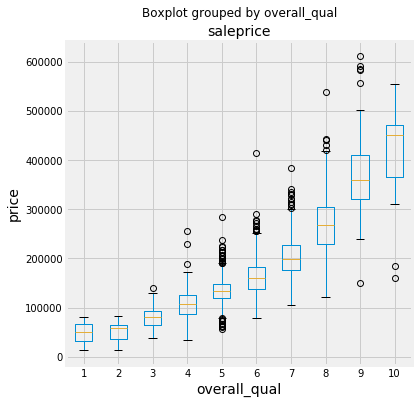

In [56]:
# Boxplot; distribution of saleprice by overall_qual
df.boxplot(column='saleprice', by='overall_qual',figsize = (6,6))
plt.ylabel("price", size=14)
plt.xlabel("overall_qual", size=14)
plt.title("saleprice", size=14);

Using the year-related columns as-is could prove to be an issue for our model, as it would consider the year values to be a continuous numeric feature thinking its values are greater than that of other predictor's values. We can treat `year_built`, `year_remod/add`, `yr_sold` and `garage_yr_blt` as catergorical (nominal). We create dummy variables for these before passing into the correlation matrix. 

In [57]:
# Define function to plot boxplot for the year-related variables
"""Function plots column1 distribution by column2 ranges, title and xlabel."""
def boxplot_year(column1,column2,title,xlabel):
    """set figure size 20 by 11."""
    df.boxplot(column=column1, by=column2,figsize = (20,11))
    """Customise title and xlabel."""
    plt.title(title, size=16)
    plt.xlabel(xlabel, size=16)
    plt.xticks(rotation=90, size=12);

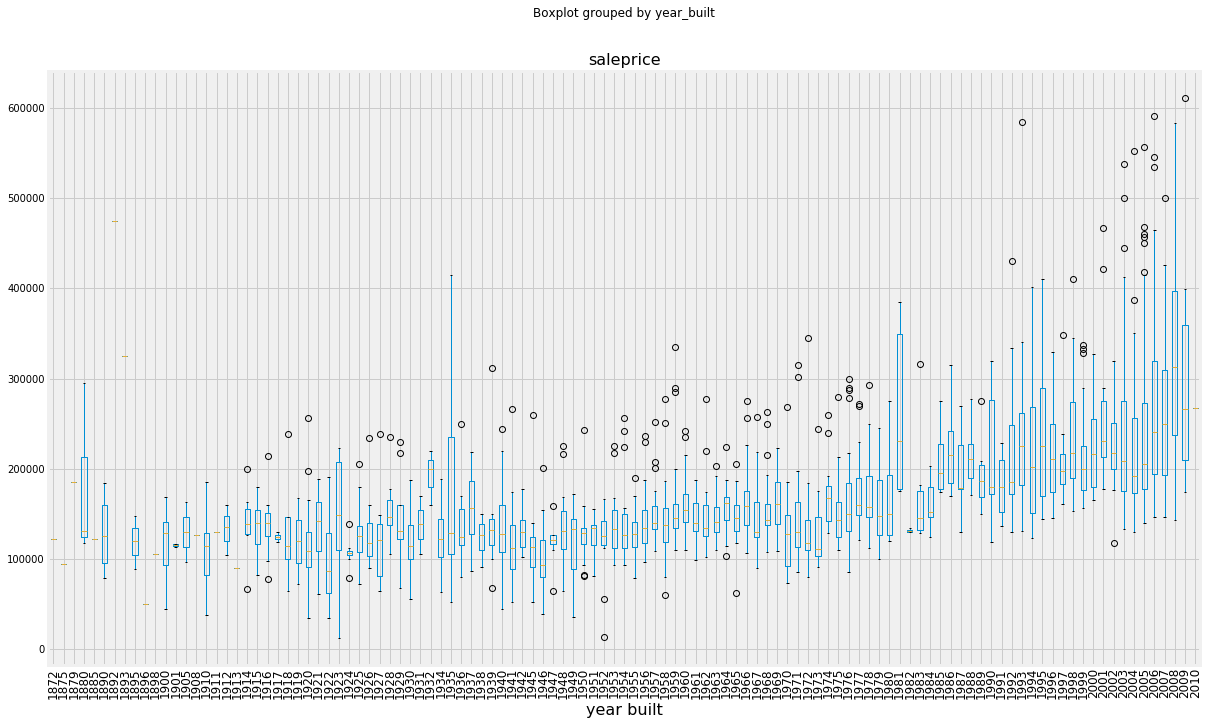

In [58]:
# Saleprice distribution by year_built
boxplot_year('saleprice','year_built',"saleprice","year built")

We see there is variance in the distribution of the saleprice across the year built. In general, there is an upwards trend in the average saleprice as year increases.

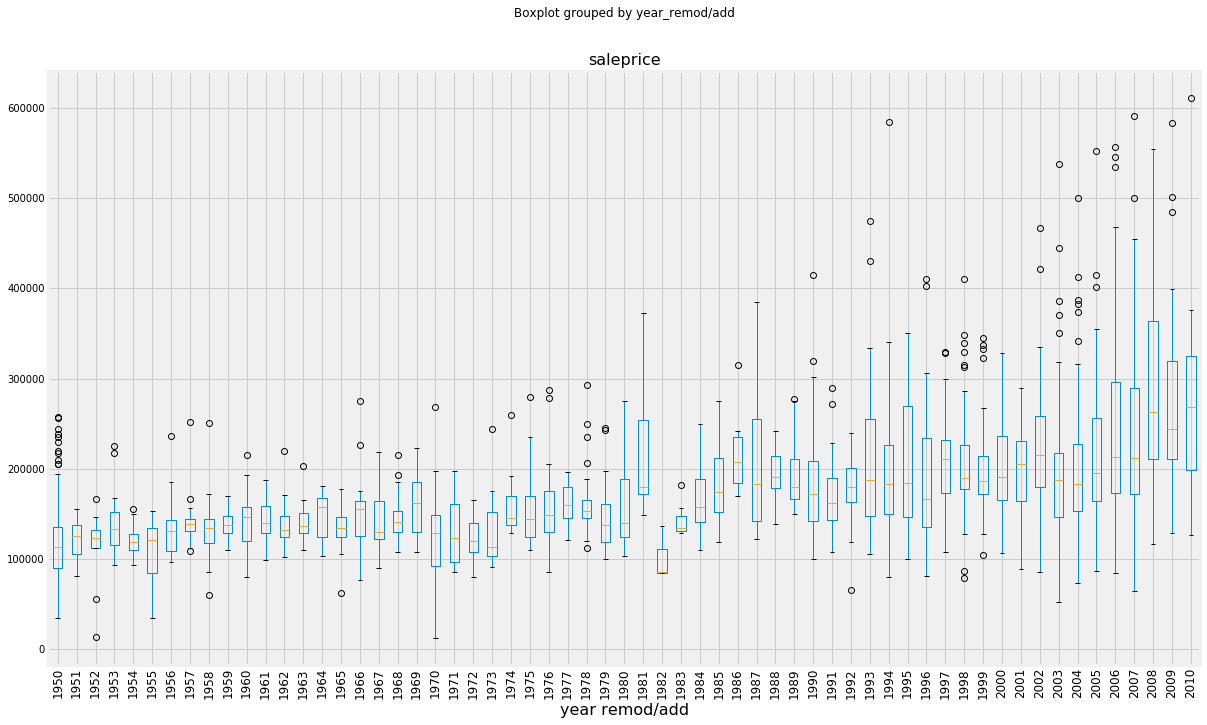

In [59]:
# Distribution of saleprice by year_remod/add
boxplot_year('saleprice','year_remod/add',"saleprice","year remod/add")

There is an upwards trend in the saleprice by year remod/add as well. 

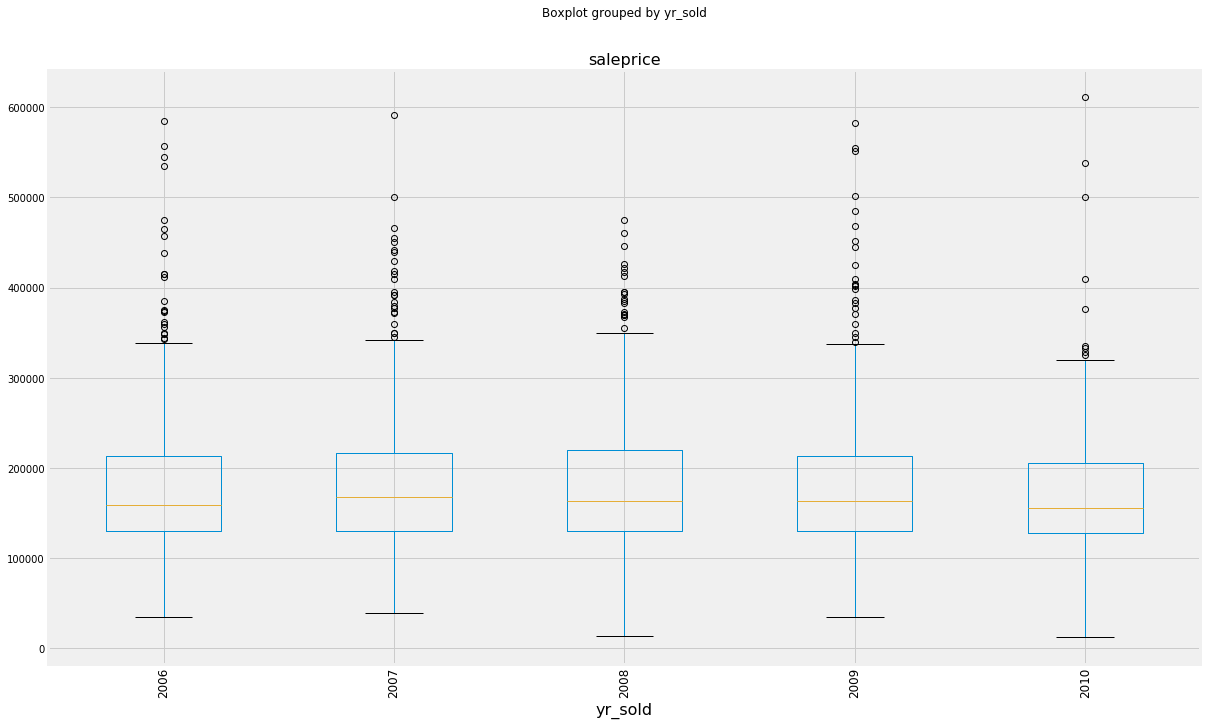

In [60]:
# Distribution of saleprice by yr_sold
boxplot_year('saleprice','yr_sold',"saleprice","yr_sold")

The variance in saleprice by `yr_sold` is not significant for `yr_sold` to be considered as a predictor to the `target`. The `median` saleprice has not varied significantly, as is the min-max ranges and quantiles.

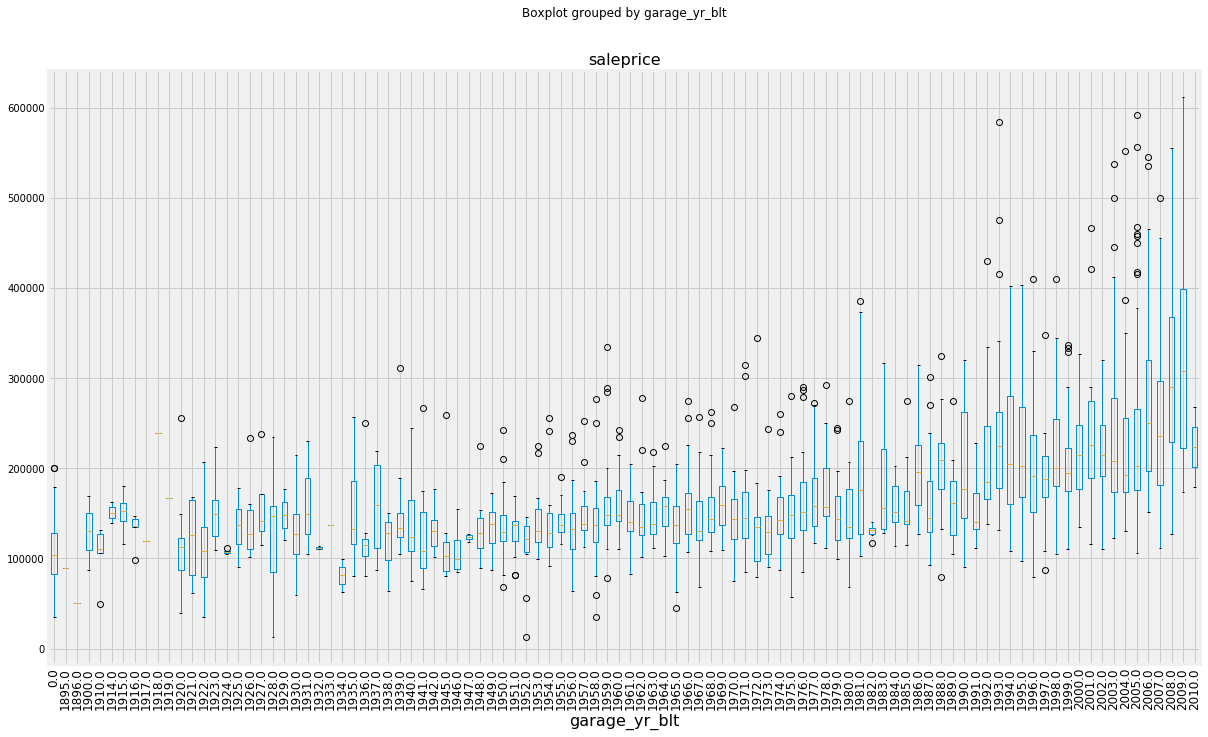

In [61]:
# Distribution of saleprice by garage_yr_blt
boxplot_year('saleprice','garage_yr_blt',"saleprice","garage_yr_blt")

The variance in `saleprice` follows a similar trend to that for `year_built` and `year_remod/add`. There is an upwards trend in the average saleprice as the year increases.

We will select `year_built`, `year_remod/add` and `garage_yr_blt` for feature processing.

### Feature Engineering 1 (year variables)

In [62]:
# year_built summary statistics
df[['year_built','year_remod/add','garage_yr_blt']].median()

year_built        1974.0
year_remod/add    1993.0
garage_yr_blt     1978.0
dtype: float64

Engineer dummy variables using `median` values.
- year_built_aft1974 (built after 1974) as 1
- year_remod/add_aft1993 (remod/add after 1993) as 1
- garage_yr_blt_aft1978 (sold after 1978) as 1

In [63]:
# Review the datatypes
print(df['year_built'].dtypes)
print(df['year_remod/add'].dtypes)
print(df['garage_yr_blt'].dtypes)

int64
int64
float64


In [64]:
# Feature engineering
df['year_built_aft1974'] = (df['year_built'] > 1974).astype(int)
# Review distribution of encoded feature
df['year_built_aft1974'].value_counts()

0    1027
1    1022
Name: year_built_aft1974, dtype: int64

In [65]:
# Feature engineering
df['year_remod/add_aft1993'] = (df['year_remod/add'] > 1993).astype(int)
# Review distribution of encoded feature
df['year_remod/add_aft1993'].value_counts()

0    1041
1    1008
Name: year_remod/add_aft1993, dtype: int64

In [66]:
# Feature engineering
df['garage_yr_blt'] = (df['garage_yr_blt'] > 2008).astype(int)
# Review distribution of encoded feature
df['garage_yr_blt'].value_counts()

0    2030
1      19
Name: garage_yr_blt, dtype: int64

### Correlation of Numerical Variables to Target

In [67]:
# Correlation with target
"""Return ascending correlation values per variable (numerical datatype)."""
"""Assign to cor_target1."""
cor_target1 = abs(df.corr()['saleprice']).sort_values()
"""Return variables with correlation more than 0.5 to target."""
cor_target1[cor_target1>0.5]

mas_vnr_area          0.503417
totrms_abvgrd         0.503509
full_bath             0.537913
year_remod/add        0.550142
year_built_aft1974    0.562243
year_built            0.571726
1st_flr_sf            0.618345
total_bsmt_sf         0.628894
garage_cars           0.648007
garage_area           0.650097
gr_liv_area           0.697032
overall_qual          0.800028
saleprice             1.000000
Name: saleprice, dtype: float64

Variables with corr above 0.5 considered relevant predictors to target.

In [68]:
# Create a dataframe for heatmap
"""Assign the variables with more than 0.5 correlation to target."""
"""Pass in 'year_remod/add_aft1993' in place of 'year_remod/add'."""
df_heatmap1 = df[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf','year_built',\
                 'year_built_aft1974','year_remod/add','year_remod/add_aft1993','full_bath','totrms_abvgrd','mas_vnr_area',\
                  'saleprice']]

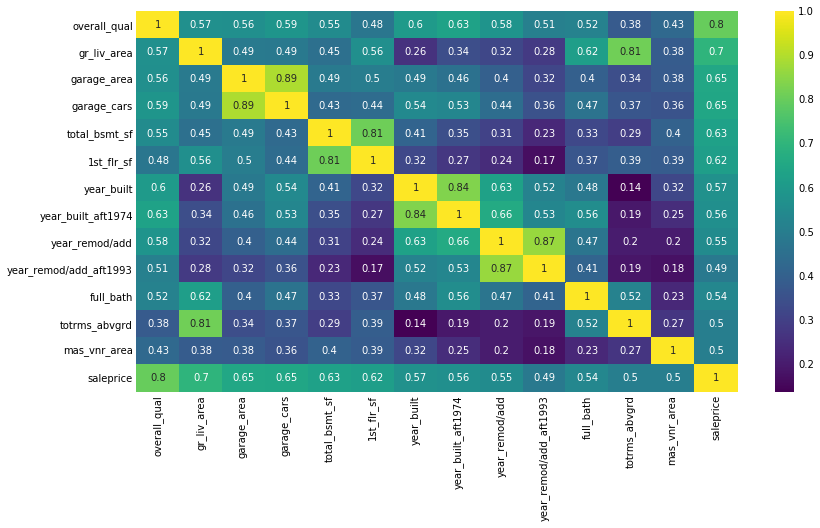

In [69]:
# Heatmap to review correlation among these variables
"""Set figure size as 12 by 7"""
plt.figure(figsize=(12,7))
"""Plot heatmap with annotation, colormap of viridis"""
sns.heatmap(df_heatmap1.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

High corr value between: 
- `garage_area` and `garage_cars`. We will use `garage_area` as predictor.
- `total_bsmt_sf` and `1st_flr_sq`. Use `total_bsmt_sf` as predictor.
- `year_built` and `year_built_aft1974`. Use the engineered feature `year_built_aft1974` as predictor.
- `year_remod/add`, `year_remod/add_after1993` with `year_built_aft1974`. Use `year_built_aft1974`.
- `gr_liv_area`, `totrms_abvgrd`. Use `gr_liv_area`.

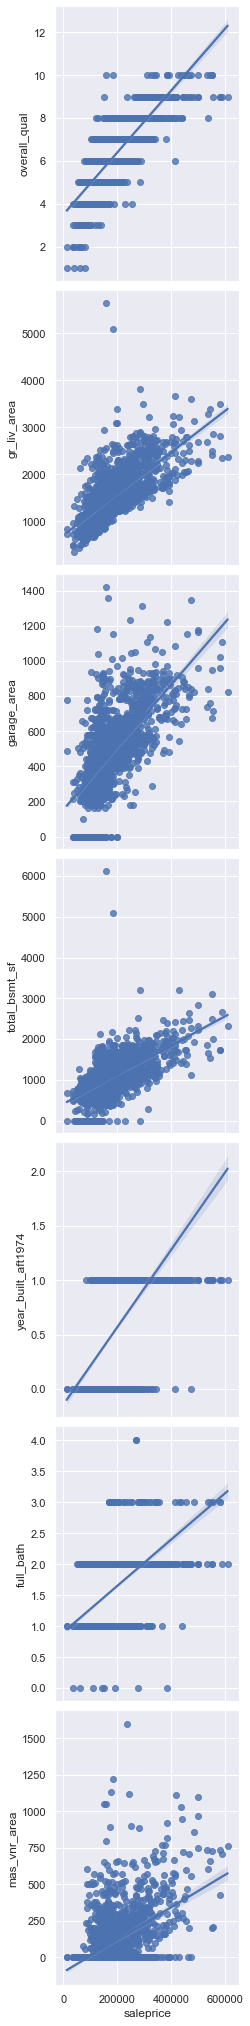

In [70]:
# Check linearity of predictors to target
"""Set sns plot grid to darkgrid."""
sns.set(style="darkgrid")
"""Visualise linearity of variables to target."""
"""set pairplot kind to reg to display regression line."""
sns.pairplot(df, y_vars=['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974',\
                         'full_bath','mas_vnr_area'],x_vars=['saleprice'],height=4, aspect=.8, kind="reg");

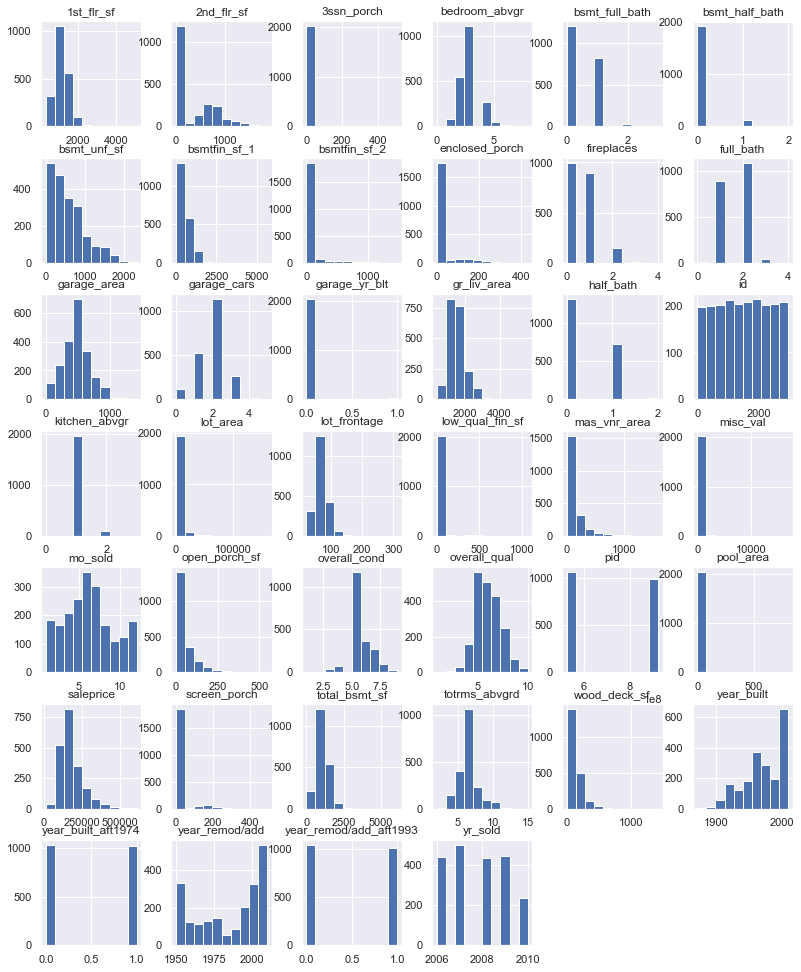

In [71]:
# Histogram for numerical columns
"""Set grid to True to improve interpretability of histogram"""
df.hist(figsize=(12,17), grid=True);

Observe that saleprice has data majority below 40_000 range; expect that the model would not perform well for saleprice predicton above 40_000. Also the skew of saleprice and observations from summary stats indicate presence of outliers.

We shortlist the following variables for as predictors to target for build our first model: `overall_qual`, `gr_liv_area`, `garage_area`, `total_bsmt_sf`, `year_built_aft1974`, `full_bath`, `mas_vnr_area`.

#### Checking Outliers in the Predictors

In [72]:
# Define a function for boxplot for these predictors
"""Function takes in title, column for boxplot and ylabel"""
def box_pred(title,column,ylabel):
    """Figure size 4 by 5."""
    plt.figure(figsize = (4,5))
    """Boxplot for input column."""
    sns.boxplot(data = column, linewidth=2, fliersize=3)
    """Customize boxplot title and label fontsizes."""
    plt.title(title, size=14)
    plt.ylabel(ylabel, size=12)
    plt.yticks(size=10)
    plt.xticks(size=10);

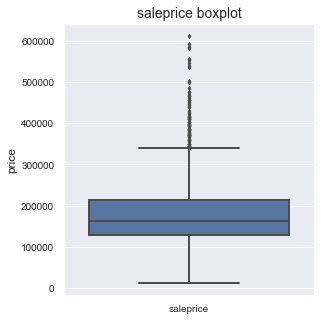

In [73]:
# Distribution of saleprice
box_pred("saleprice boxplot",df[['saleprice']],"price")

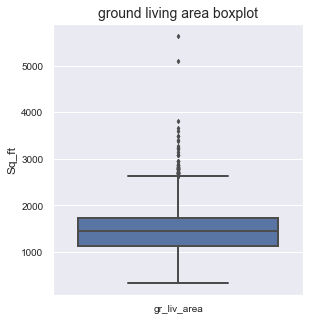

In [74]:
# Distribution of gr_liv_area
box_pred("ground living area boxplot",df[['gr_liv_area']],"Sq_ft")

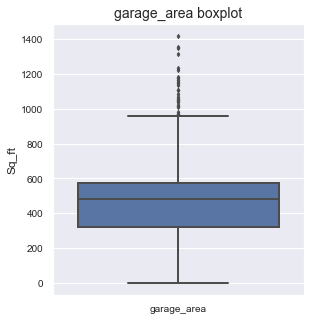

In [75]:
# Distribution of garage_area
box_pred("garage_area boxplot",df[['garage_area']],"Sq_ft")

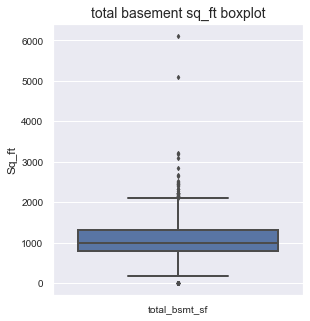

In [76]:
# Distribution of total_bsmt_sf
box_pred("total basement sq_ft boxplot",df[['total_bsmt_sf']],"Sq_ft")

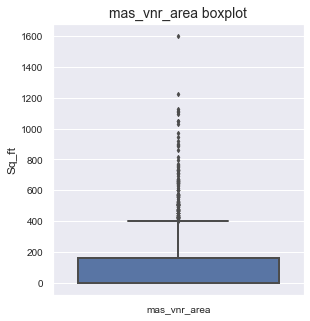

In [77]:
# Distribution of mas_vnr_area
box_pred("mas_vnr_area boxplot",df[['mas_vnr_area']],"Sq_ft")

This is a general trend in the outliers of these predictor variables contributing to the outliers in price. If we don't account for these, the model is not expect to do well for higher saleprice predictions. 

### Feature Engineering 2 (Dummy Variables; Outliers)

In [78]:
# Summary statistics of predictors
df[['gr_liv_area','garage_area','total_bsmt_sf','mas_vnr_area']].describe() 

,gr_liv_area,garage_area,total_bsmt_sf,mas_vnr_area
count,2049.000000,2049.000000,2049.000000,2049.000000
mean,1499.464129,473.766227,1058.084919,98.722792
std,500.461893,215.944850,449.498894,174.382527
min,334.000000,0.000000,0.000000,0.000000
25%,1130.000000,319.000000,793.000000,0.000000
50%,1444.000000,480.000000,995.000000,0.000000
75%,1728.000000,576.000000,1319.000000,160.000000
max,5642.000000,1418.000000,6110.000000,1600.000000


Engineer dummy variable (sq_ft x (positive) std deviation away from mean.
Iterative process to evaluate suitable std deviation via 
- huge_gr_liv_area (> 4_000) 4std dev
- huge_garage_area (> 1_122); 3std dev
- huge total_bsmt_sf (> 2_858); 4std dev
- huge mas_vnr_area (> 974); 5std dev

In [79]:
# Create dummy feature huge_gr_liv_area
"""More than 3_750 sq ft : 1. less than or equal 3_750 sq ft : 0."""
df['huge_gr_liv_area'] = (df['gr_liv_area'] > 3_750).astype(int)
"""Review distribution of encoded variable"""
df['huge_gr_liv_area'].value_counts()

0    2046
1       3
Name: huge_gr_liv_area, dtype: int64

In [80]:
# Create dummy feature huge_garage_area
"""More than 1_122 sq ft : 1. less than or equal 1_122 sq ft : 0."""
df['huge_garage_area'] = (df['garage_area'] > 1_122).astype(int)
"""Review distribution of encoded variable"""
df['huge_garage_area'].value_counts()

0    2037
1      12
Name: huge_garage_area, dtype: int64

In [81]:
# Create dummy feature huge_total_bsmt_sf
"""More than 2_858 sq ft : 1. less than or equal 2_858 sq ft : 0."""
df['huge_total_bsmt_sf'] = (df['total_bsmt_sf'] > 2_858).astype(int)
"""Review distribution of encoded variable"""
df['huge_total_bsmt_sf'].value_counts()

0    2044
1       5
Name: huge_total_bsmt_sf, dtype: int64

In [82]:
# Create dummy feature huge_mas_vnr_area
"""More than 974 sq ft : 1. less than or equal 974 sq ft : 0."""
df['huge_mas_vnr_area'] = (df['mas_vnr_area'] > 974).astype(int)
"""Review distribution of encoded variable"""
df['huge_mas_vnr_area'].value_counts()

0    2040
1       9
Name: huge_mas_vnr_area, dtype: int64

### Modeling & Evaluation (Model 1)

We build the first model for the shortlisted predictors and also visualise the MLR lines to improve the fitting of the regression lines for the created dummy vairables. Predictors for Model 1 are: `overall_qual, gr_liv_area, garage_area, total_bsmt_sf, year_built_aft1974, full_bath, mas_vnr_area, huge_gr_liv_area,huge_garage_area,huge_total_bsmt_sf,huge mas_vnr_area`.

In [83]:
# X and y variables for Model 1
"""Assign X1 to predictors for Model 1."""
X1 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
        'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','huge_mas_vnr_area']].values
"""Assign y1 to target for Model 1."""
y1 = df['saleprice'].values

In [84]:
# Instantiate model
model_1 = LinearRegression()
# Fit model
model_1.fit(X1, y1)
"""Predict saleprice based on shortlisted predictors."""
"""Assign prediction as y_pred_1"""
y_pred_1 = model_1.predict(X1)

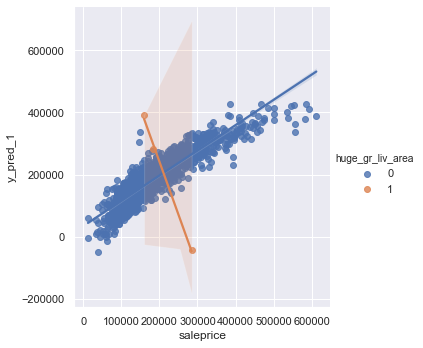

In [85]:
# Visualise MLR, True saleprice vs. predicted saleprice
# Regression line by huge_gr_liv_area
df['y_pred_1'] = y_pred_1
sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_gr_liv_area');

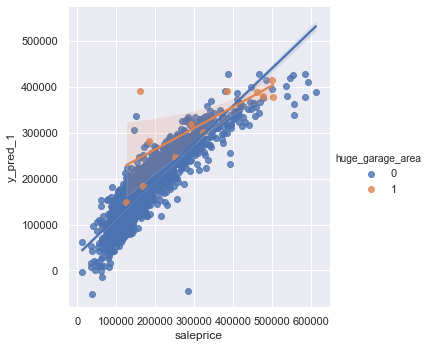

In [86]:
# Regression line by huge_garage_area
sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_garage_area');

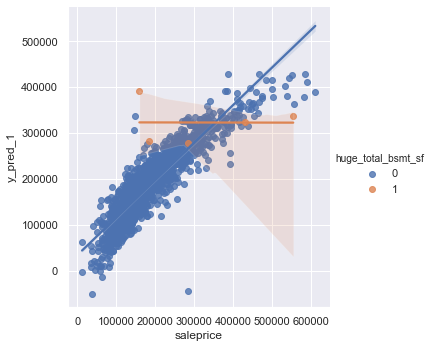

In [87]:
# Regression line by huge_total_bsmt_sf
sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_total_bsmt_sf');

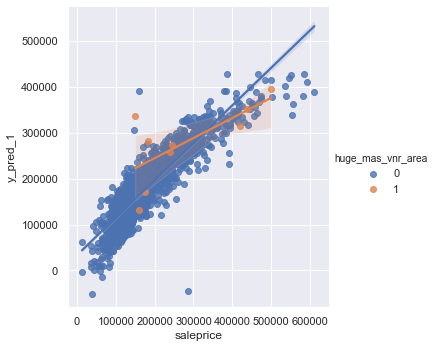

In [88]:
# Regression line by uge_mas_vnr_area
sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_mas_vnr_area');

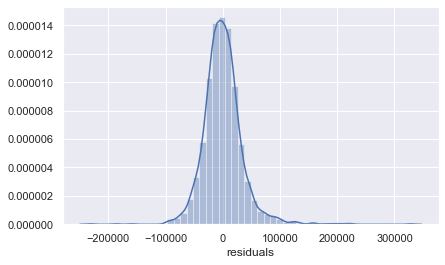

In [89]:
# Visualise normality of residuals (errors)
df['residuals'] = df['saleprice'] - df['y_pred_1']
sns.distplot(df['residuals']);

The distribution of the errors are approximately normal, with a slight right skew.

#### Functions for model metrics

In [90]:
# define function for r2 adjusted
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [91]:
# define function to compute model metrics
def model_metrics(y_true, y_pred, p):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [92]:
# Model 1 metrics
model_metrics(df['saleprice'],y_pred_1,X1.shape[1])

Mean squared error      =  1183024709.2469404
Root mean squared error =  34395.12624263706
R^2                     =  0.8116027626857274
Adjusted R^2            =  0.8105853991067107


In [93]:
# Model intercept and coefficients
print(f"model intercept : {round(model_1.intercept_,2)}.")
print(f"model coefficients : {model_1.coef_}.")

model intercept : -82223.25.
model coefficients : [ 1.92674447e+04  5.32382241e+01  5.38524096e+01  3.54999643e+01
  1.39157650e+04 -5.24132087e+03  5.35077291e+01 -2.79857826e+05
 -1.77925087e+04 -6.09212893e+04 -5.35714079e+04].


Interpretating the model parameters, the intercept indicates there is a certain amount of bias as a housing without the the range of predictors used should still command a positive sale value. Selecting the first coefficient, one unit increase in overall quality of the housing increases the saleprice of that housing by approx. 19_000 dollars.

### Feature Engineering 3 (Categorical Ordinal Variables)

From the data dict, there are both `ordinal` and `nominal` catergorical variables. Given that we want to
- limit the number of variables for regression between 25-30,
- for most `ordinal` categorical variables, the association to saleprice can be generalised by proxy via quality/ condition rating.\
Hence, we review `ordinal` categorical variables next, by looking at their saleprice distribution by ordinal ranks. If there is a meaningful difference in the distribution, the variables could be associated to the target. 

We will review the following `ordinal` variables: `utilities`,`exter_qual`,`exter_cond`,`bsmt_qual`,`bsmt_cond`,`bsmt_exposure`,`bsmtfin_type_1`,`bsmtfin_type_2`,`heating_qc`,\
`central_air`,`electrical`,`kitchen_qual`,`functional`,`fireplace_qu`,`garage_finish`,`garage_qual`,`garage_cond`,`pool_qc`,`fence`.

In [94]:
# Define function to plot boxplot for the ordinal variables
"""Function plots column1 distribution by column2 ranges, title and xlabel."""
def boxplot_ord(column1,column2,title,xlabel):
    """set figure size 6 by 6."""
    df.boxplot(column=column1, by=column2,figsize = (6,6))
    """Customise title and xlabel."""
    plt.title(title, size=14)
    plt.xlabel(xlabel, size=14);

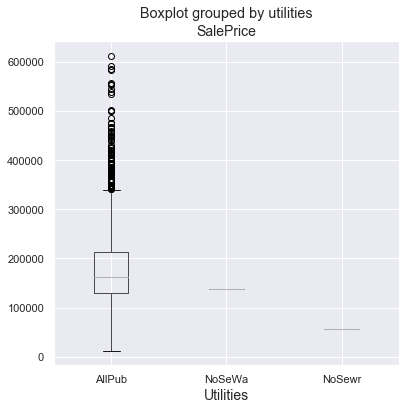

In [95]:
# Distribution of Saleprice by Utilities
boxplot_ord('saleprice','utilities',"SalePrice","Utilities")

There is a distinct difference in the median saleprice for the different classes of utilities. The availability of `AllPub` is stongly associated with the `saleprice`. We can infer that it is considered as a basic necessity to prospective house seekers.

In [96]:
# Define dictionaries of ordinal variable's rank classes
utility_dict = {'AllPub':4,'NoSeWa':3,'NoSewr':2,'ELO':1}
ex_po_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
ex_na_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
gd_na_dict = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
glq_na_dict = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
elect_dict = {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
fn_dict = {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
garfin_dict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
pool_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'NA':1}
fence_dict = {'GdPrv':5,'MnPrv':4,'GdWo':3,'MnWw':2,'NA':1}

In [97]:
# Feature engineering for utilities 
# Classes from Data dict: AllPub,NoSeWa,NoSewr,ELO
"""Review counts of utilities classes."""
print(df['utilities'].value_counts())
"""Encode classes in descending order."""
df['utilities'] = df['utilities'].map(utility_dict)
"""Review encoded classes."""
df['utilities'].value_counts()

AllPub    2047
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64


4    2047
3       1
2       1
Name: utilities, dtype: int64

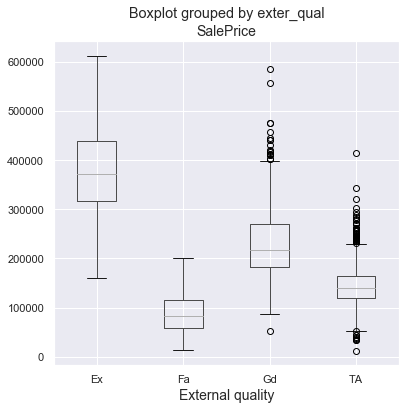

In [98]:
# Distribution of Saleprice by exter_qual
boxplot_ord('saleprice','exter_qual',"SalePrice","External quality")

There is variance in the median saleprice for the different classes of external quality. The `Ex` (excellent) class has the highest average saleprice. We can also see the general populance generally settle for housing with `TA` (typical) class and are willing to pay additional (high number of outliers). This could suggest the limited supply of `TA` rated houses and high demand. 

In [99]:
# Ordinal encoding for exter_qual
# Classes from Data dict: Ex,Gd,TA,Fa,Po
"""Review counts of exter_qual classes."""
print(df['exter_qual'].value_counts())
"""Encoding classes in descending order."""
df['exter_qual'] = df['exter_qual'].map(ex_po_dict)
"""Review encoded classes."""
df['exter_qual'].value_counts()

TA    1245
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64


3    1245
4     697
5      81
2      26
Name: exter_qual, dtype: int64

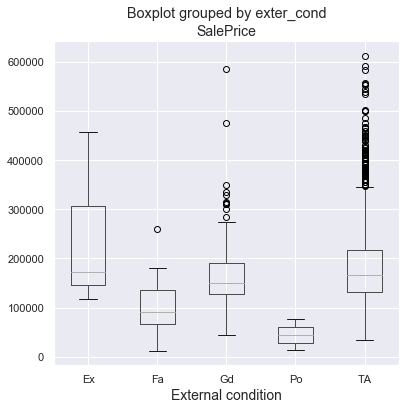

In [100]:
# Distribution of Saleprice by exter_cond
boxplot_ord('saleprice','exter_cond',"SalePrice","External condition")

There is variance in the median saleprice for the different classes of external condition. Varying distributions for exter_cond. Interestingly, the outliers for `Gd` and `TA` classes exceed the maximum saleprice for `Ex` class. There is similarity in the `saleprice` distributions between `exter_cond` and `exter_qual`.

In [101]:
# Ordinal encoding for exter_cond
# Classes from Data dict: Ex,Gd,TA,Fa,Po
"""Review counts of exter_qual classes."""
print(df['exter_cond'].value_counts())
"""Encoding classes in descending order."""
df['exter_cond'] = df['exter_cond'].map(ex_po_dict)
"""Review encoded classes."""
df['exter_cond'].value_counts()

TA    1776
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64


3    1776
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64

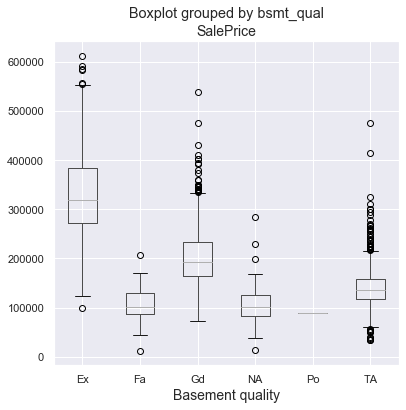

In [102]:
# Distribution of saleprice by bsmt_qual
boxplot_ord('saleprice','bsmt_qual',"SalePrice","Basement quality")

There is a distinct variance in the median saleprice for the different classes of basement quality. In particular, i) the median saleprice for classes `Fa`, `Po` and `NA` are fairly consistent, while ii) there is an upwards trend for saleprice distribution from classes `TA` onwards to `Ex`.

In [103]:
# Ordinal encoding for bsmt_qual
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of exter_qual classes."""
print(df['bsmt_qual'].value_counts())
"""Encoding classes in descending order."""
df['bsmt_qual'] = df['bsmt_qual'].map(ex_na_dict)
"""Review encoded classes."""
print(df['bsmt_qual'].value_counts())

TA    887
Gd    863
Ex    184
Fa     60
NA     54
Po      1
Name: bsmt_qual, dtype: int64
3    887
4    863
5    184
2     60
0     54
1      1
Name: bsmt_qual, dtype: int64


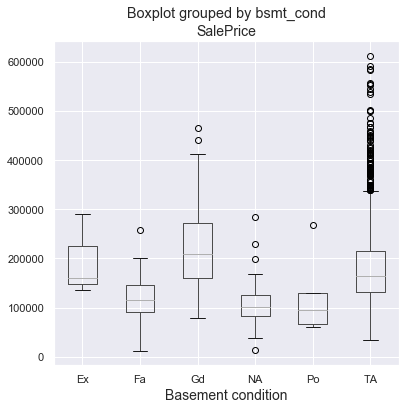

In [104]:
# Distribution of saleprice by bsmt_cond
boxplot_ord('saleprice','bsmt_cond',"SalePrice","Basement condition")

There is a distinct variance in the median saleprice for the different classes of basement condition. In particular, i) the median saleprice for classes `Fa`, `Po` and `NA` are fairly consistent, while ii) there is an cluster for in saleprice distribution for classes `TA`, `Gd` and `Ex`.

In [105]:
# Ordinal encoding for bsmt_cond
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of bsmt_cond classes."""
print(df['bsmt_cond'].value_counts())
"""Encoding classes in descending order."""
df['bsmt_cond'] = df['bsmt_cond'].map(ex_na_dict)
"""Review encoded classes."""
print(df['bsmt_cond'].value_counts())

TA    1833
Gd      89
Fa      65
NA      54
Po       5
Ex       3
Name: bsmt_cond, dtype: int64
3    1833
4      89
2      65
0      54
1       5
5       3
Name: bsmt_cond, dtype: int64


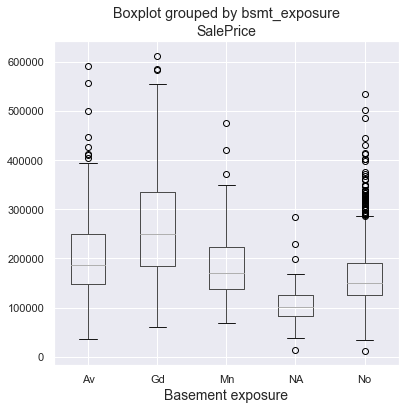

In [106]:
# Distribution of saleprice by bsmt_exposure
boxplot_ord('saleprice','bsmt_exposure',"SalePrice","Basement exposure")

There is a slight variance in saleprice distribution. `Gd` class has a higher median saleprice than the rest of the other classes. The median saleprice is fairly consistent between `Av`, `Mn` and `No` classes.

In [107]:
# Ordinal encoding for bsmt_exposure
# Data dict: Gd,Av,Mn,No,NA
"""Review counts of bsmt_exposure classes."""
print(df['bsmt_exposure'].value_counts())
"""Encoding classes in descending order."""
df['bsmt_exposure'] = df['bsmt_exposure'].map(gd_na_dict)
"""Review encoded classes."""
print(df['bsmt_exposure'].value_counts())

No    1341
Av     288
Gd     203
Mn     163
NA      54
Name: bsmt_exposure, dtype: int64
1    1341
3     288
4     203
2     163
0      54
Name: bsmt_exposure, dtype: int64


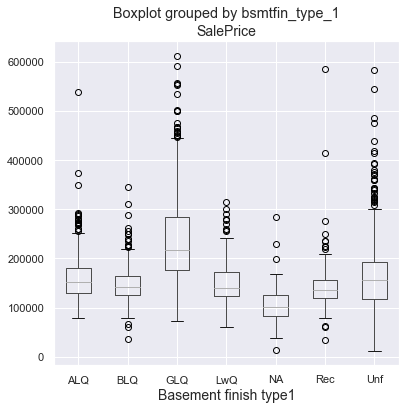

In [108]:
# Distribution of saleprice by bsmtfin_type_1
boxplot_ord('saleprice','bsmtfin_type_1',"SalePrice","Basement finish type1")

Class `GLQ` has a higher median saleprice than the rest of the other classes. The median saleprice is fairly consistent between the rest of the other classes. Both `GLQ` and `Unf` has more outliers than the other classes.

In [109]:
# Ordinal encoding for bsmtfin_type_1
# Data dict: GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA
"""Review counts of bsmtfin_type_1 classes."""
print(df['bsmtfin_type_1'].value_counts())
"""Encoding classes in descending order."""
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].map(glq_na_dict)
"""Review encoded classes."""
print(df['bsmtfin_type_1'].value_counts())

GLQ    615
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
NA      54
Name: bsmtfin_type_1, dtype: int64
6    615
1    603
5    292
4    200
3    183
2    102
0     54
Name: bsmtfin_type_1, dtype: int64


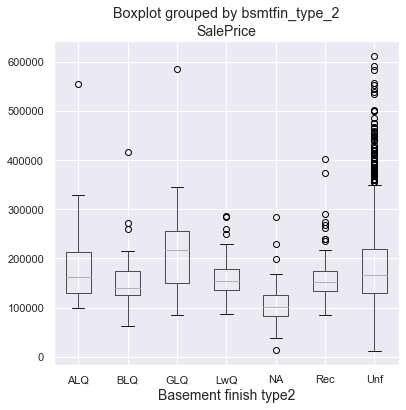

In [110]:
# Distribution of saleprice by bsmt_fin_type_2
boxplot_ord('saleprice','bsmtfin_type_2',"SalePrice","Basement finish type2")

The median saleprice is fairly consistent between classes `ALQ1`, `BLQ`, `LwQ` and `Rec`. Class `NA` has lowest median saleprice while `GLQ` has the highest median saleprice. Class `Unf` has the most number of outliers.

In [111]:
# Ordinal encoding for bsmtfin_type_2
# Data dict: GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA
"""Review counts of bsmtfin_type_2 classes."""
print(df['bsmtfin_type_2'].value_counts())
"""Encoding classes in descending order."""
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].map(glq_na_dict)
"""Review encoded classes."""
print(df['bsmtfin_type_2'].value_counts())

Unf    1749
Rec      80
LwQ      60
NA       54
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64
1    1749
3      80
2      60
0      54
4      48
5      35
6      23
Name: bsmtfin_type_2, dtype: int64


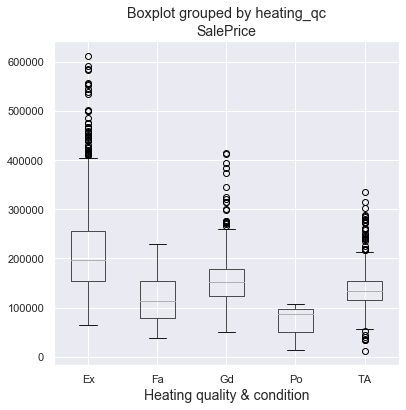

In [112]:
# Distribution of saleprice by heating_qc
boxplot_ord('saleprice','heating_qc',"SalePrice","Heating quality & condition")

There is variance in saleprice distribution among the different classes of `heating_qc`. `Ex` class has the highest median saleprice. High number of outliers is observed for `Ex`, `Gd` and `TA` classes. We can see propsective house seekers consider Heating quality and condition as basic necessity, with the majority of higher saleprice leaning towards these classes above `TA` to `Ex` range.

In [113]:
# Ordinal encoding for heating_qc
# Data dict: Ex,Gd,TA,Fa,Po
"""Review counts of heating_qc classes."""
print(df['heating_qc'].value_counts())
"""Encoding classes in descending order."""
df['heating_qc'] = df['heating_qc'].map(ex_po_dict)
"""Review encoded classes."""
print(df['heating_qc'].value_counts())

Ex    1064
TA     596
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64
5    1064
3     596
4     319
2      67
1       3
Name: heating_qc, dtype: int64


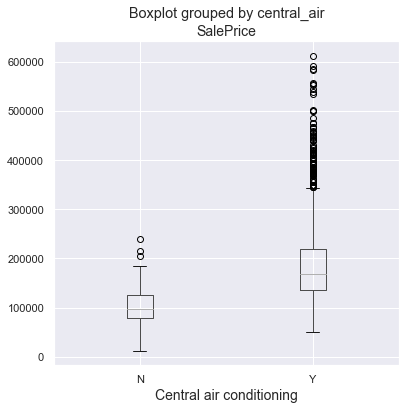

In [114]:
# Distribution of saleprice by central_air
boxplot_ord('saleprice','central_air',"SalePrice","Central air conditioning")

Distinct variance in saleprice distribution between the two classes. Prospective house seekers prefers housing with central air conditioning available.

In [115]:
# Nominal encoding for central_air
"""Note this is nominal category."""
# Data dict: N,Y
"""Review counts of heating_qc classes."""
print(df['central_air'].value_counts())
"""Encoding binary classes."""
df['central_air'] = df['central_air'].map({'N':0,'Y':1})
"""Review encoded classes."""
print(df['central_air'].value_counts())

Y    1908
N     141
Name: central_air, dtype: int64
1    1908
0     141
Name: central_air, dtype: int64


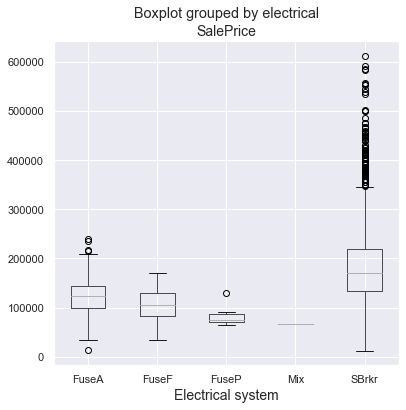

In [116]:
# Distribution of saleprice by electrical
boxplot_ord('saleprice','electrical',"SalePrice","Electrical system")

There is a cluster in saleprice distribution for `FuseA` and `FuseF`. `Sbrkr` has very significant number of outliers. `Mix` class has the lowest median saleprice. The strong inclination for `SBrkr` (hence higher saleprice in general) could be due to firesafety reasons. 

In [117]:
# Ordinal encoding for electrical
# Data dict: SBrkr,FuseA,FuseF,FuseP,Mix
"""Review counts of electrical classes."""
print(df['electrical'].value_counts())
"""Encoding classes in descending order."""
df['electrical'] = df['electrical'].map(elect_dict)
"""Review encoded classes."""
print(df['electrical'].value_counts())

SBrkr    1867
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64
5    1867
4     139
3      35
2       7
1       1
Name: electrical, dtype: int64


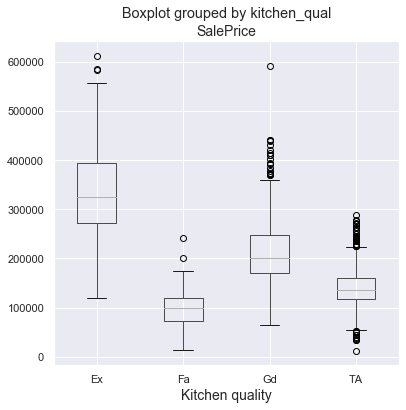

In [118]:
# Distribution of saleprice by kitchen_qual
boxplot_ord('saleprice','kitchen_qual',"SalePrice","Kitchen quality")

Distinct variance in median saleprice across each classes. `Ex` class has highest saleprice (median, minimum, maximum). `Fa` class has the lowest median saleprice.

In [119]:
# Ordinal encoding for kitchen_qual
# Data dict: Ex,Gd,TA,Fa,Po
"""Review counts of kitch_qual classes."""
print(df['kitchen_qual'].value_counts())
"""Encoding classes in descending order."""
df['kitchen_qual'] = df['kitchen_qual'].map(ex_po_dict)
"""Review encoded classes."""
print(df['kitchen_qual'].value_counts())

TA    1046
Gd     805
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64
3    1046
4     805
5     151
2      47
Name: kitchen_qual, dtype: int64


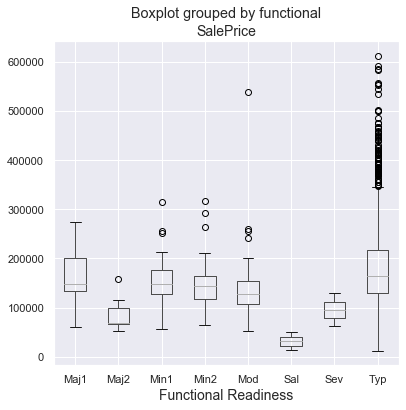

In [120]:
# Distribution of saleprice by functional
boxplot_ord('saleprice','functional',"SalePrice","Functional Readiness")

`Sal` class has the lowest range of saleprice. Understandbly, it is strongly tied to housing of low value as house of slavage condition is not suited for living to general populance. `Sev` and `Maj2` classes forms a cluster in saleprice distribution. The median saleprice is fairly consistent across `Maj1`, `Min1`, `Min2`, `Mod` and `Typ` classes. `Typ` has significant number of outliers. We can infer prospective house seekers generally prefer housing requiring little to no repairs.

In [121]:
# Ordinal encoding for functional
# Data dict: Typ,Min1,Min2,Mod,Maj1,Maj2,Sev,Sal
"""Review counts of functional classes."""
print(df['functional'].value_counts())
"""Encoding classes in descending order."""
df['functional'] = df['functional'].map(fn_dict)
"""Review encoded classes."""
print(df['functional'].value_counts())

Typ     1913
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: functional, dtype: int64
7    1913
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64


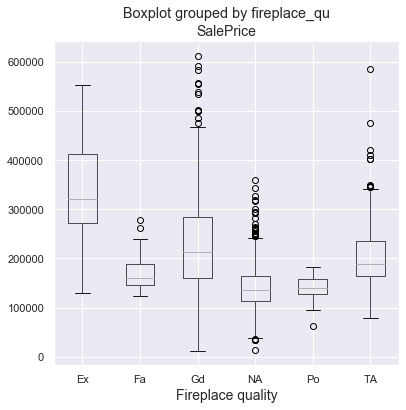

In [122]:
# Distribution of saleprice by fireplace_qu
boxplot_ord('saleprice','fireplace_qu',"SalePrice","Fireplace quality")

Observe that there is a cluster in saleprice distribution among `Fa`, `Po` and `NA` classes. `Ex` has the highest median saleprice. Interestingly, `Gd` class has outliers that exceeds the maximum saleprice for `Ex` class. We can infer that houses that have highest saleprice don't necessarily have excellent fireplace. 

In [123]:
# Ordinal encoding for fireplace_qu
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of fireplace_qu classes."""
print(df['fireplace_qu'].value_counts())
"""Encoding classes in descending order."""
df['fireplace_qu'] = df['fireplace_qu'].map(ex_na_dict)
"""Review encoded classes."""
print(df['fireplace_qu'].value_counts())

NA    998
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64
0    998
4    523
3    407
2     59
5     31
1     31
Name: fireplace_qu, dtype: int64


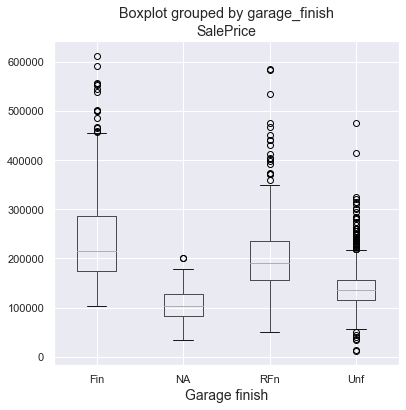

In [124]:
# Distribution of saleprice by garage_finish
boxplot_ord('saleprice','garage_finish',"SalePrice","Garage finish")

There is variance in the saleprice distribution. `NA` class has the lowest saleprice. The range of saleprice increases from `Unf` to `RFn` and `Fin` classes.

In [125]:
# Ordinal encoding for garage_finish
# Data dict: Fin,RFn,Unf,NA
"""Review counts of garage_finish classes."""
print(df['garage_finish'].value_counts())
"""Encoding classes in descending order."""
df['garage_finish'] = df['garage_finish'].map(garfin_dict)
"""Review encoded classes."""
print(df['garage_finish'].value_counts())

Unf    848
RFn    579
Fin    509
NA     113
Name: garage_finish, dtype: int64
1    848
2    579
3    509
0    113
Name: garage_finish, dtype: int64


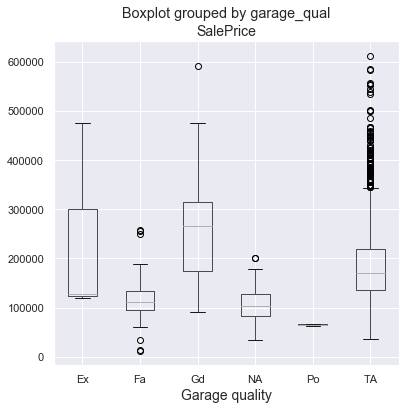

In [126]:
# Distribution of saleprice by garage_qual
boxplot_ord('saleprice','garage_qual',"SalePrice","Garage quality")

There is a cluster in saleprice distribution among `Fa`, `Po` and `NA` classes. `Po` class has the lowest saleprice. There is a significant number of outliers in saleprice for the `TA` class. The highest outlier (above 600_000) exceed the maximum (approx. 490_000) in `Ex` and `Fa`. This could be due to high demand for limited number of houses with `TA` garage quality.

In [127]:
# Ordinal encoding for garage_qual
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of garage_qual classes."""
print(df['garage_qual'].value_counts())
"""Encoding classes in descending order."""
df['garage_qual'] = df['garage_qual'].map(ex_na_dict)
"""Review encoded classes."""
print(df['garage_qual'].value_counts())

TA    1831
NA     113
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64
3    1831
0     113
2      82
4      18
5       3
1       2
Name: garage_qual, dtype: int64


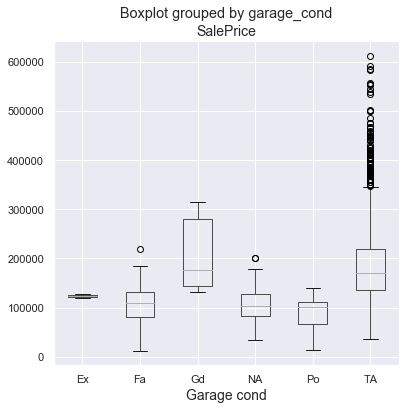

In [128]:
# Distribution of saleprice by garage_cond
boxplot_ord('saleprice','garage_cond',"SalePrice","Garage cond")

There is a cluster in saleprice distribution among `Fa`, `Po` and `NA` ratings. Interestingly, `Ex` has a median saleprice (approx. 100_000) that is close to this cluster. There is a significant number of outliers for `TA` class. This could be due to high demand for limited houses with this feature.

In [129]:
# Ordinal encoding for garage_cond
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of garage_cond classes."""
print(df['garage_cond'].value_counts())
"""Encoding classes in descending order."""
df['garage_cond'] = df['garage_cond'].map(ex_na_dict)
"""Review encoded classes."""
print(df['garage_cond'].value_counts())

TA    1867
NA     113
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64
3    1867
0     113
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64


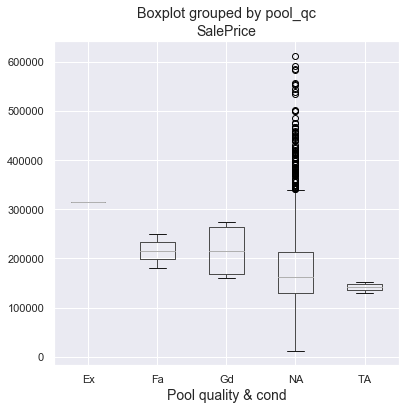

In [130]:
# Distribution of saleprice by pool_qc
boxplot_ord('saleprice','pool_qc',"SalePrice","Pool quality & cond")

The `Ex` class has a higher median saleprice (approx. 300_000) than the other classes. There is a signifcant number of outliers for `NA`. We can infer that most houses (and those with high saleprice) is unlikely have a pool.

In [131]:
# Ordinal encoding for pool_qc
# Data dict: Ex,Gd,TA,Fa,NA
"""Review counts of pool_qc classes."""
print(df['pool_qc'].value_counts())
"""Encoding classes in descending order."""
df['pool_qc'] = df['pool_qc'].map(pool_dict)
"""Review encoded classes."""
print(df['pool_qc'].value_counts())

NA    2040
Gd       4
Fa       2
TA       2
Ex       1
Name: pool_qc, dtype: int64
1    2040
4       4
3       2
2       2
5       1
Name: pool_qc, dtype: int64


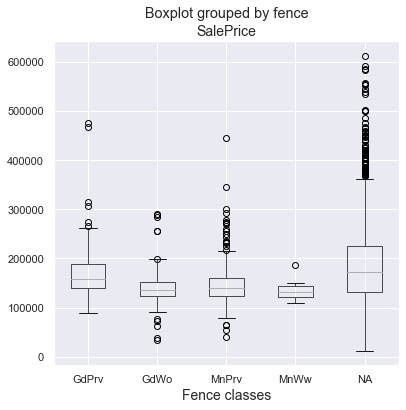

In [132]:
# Distribution of saleprice by fence
boxplot_ord('saleprice','fence',"SalePrice","Fence classes")

The median saleprice is fairly consistent for all classes. However, the `NA` class has a wider IQR (interquantile range), and range (minimum to maximum) than the rest of the other classes. Fence doesn't seem to be a prevalent feature for housing in Ames. There is a significant number of outliers in the `NA` class.

In [133]:
# Ordinal encoding for fence
# Data dict: GdPrv,MnPrv,GdWo,MnWw,NA
"""Review counts of fence classes."""
print(df['fence'].value_counts())
"""Encoding classes in descending order."""
df['fence'] = df['fence'].map(fence_dict)
"""Review encoded classes."""
print(df['fence'].value_counts())

NA       1651
MnPrv     225
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64
1    1651
4     225
5      83
3      80
2      10
Name: fence, dtype: int64


### Correlation (Encoded Ordinal Variables to Target)

In [134]:
# Dataframe of the above encoded variables + saleprice
"""Assign df_encode to dataframe of encoded ordinal variables."""
df_encode = df[['utilities','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1',\
                'bsmtfin_type_2','heating_qc','central_air','electrical','kitchen_qual','functional','fireplace_qu',\
                'garage_finish','garage_qual','garage_cond','pool_qc','fence','saleprice']]

In [135]:
# Correlation with target
"""Return ascending correlation values per variable (numerical datatype)."""
"""Assign to cor_target2."""
cor_target2 = abs(df_encode.corr()['saleprice']).sort_values()
"""Return variables with correlation more than 0.5 to target."""
cor_target2[cor_target2>0.5]

fireplace_qu     0.538615
garage_finish    0.557806
bsmt_qual        0.612414
kitchen_qual     0.692481
exter_qual       0.712062
saleprice        1.000000
Name: saleprice, dtype: float64

Interestingly, the qualitative description for quality is a stronger predictor for saleprice than condition. Review the effect of combination (two at a time) of quality features (corr above 0.7 to target) on target.

In [136]:
# Create Interaction columns
"""Between overall_qual and exter_qual."""
df['overall_qual * exter_qual'] = df['overall_qual'] * df['exter_qual']
"""Between overall_qual and kitchen_qual."""
df['overall_qual * kitchen_qual'] = df['overall_qual'] * df['kitchen_qual']
"""Between exter_qual and kitchen_qual."""
df['exter_qual * kitchen_qual'] = df['exter_qual'] * df['kitchen_qual']

In [137]:
"""Assign df_heatmap2 variables (more than 0.5 corr to target) and interaction columns."""
df_heatmap2 = df[['overall_qual','exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu',\
                  'overall_qual * exter_qual','overall_qual * kitchen_qual','exter_qual * kitchen_qual',\
                  'saleprice']]

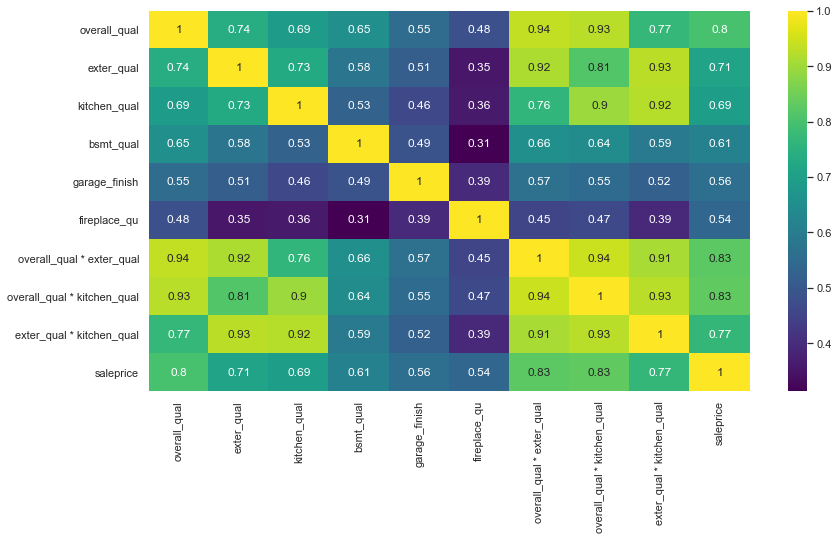

In [138]:
# Check correlation among variables
"""Set figure size as 12 by 7"""
plt.figure(figsize=(12,7))
"""Plot heatmap with annotation, colormap of viridis"""
sns.heatmap(df_heatmap2.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

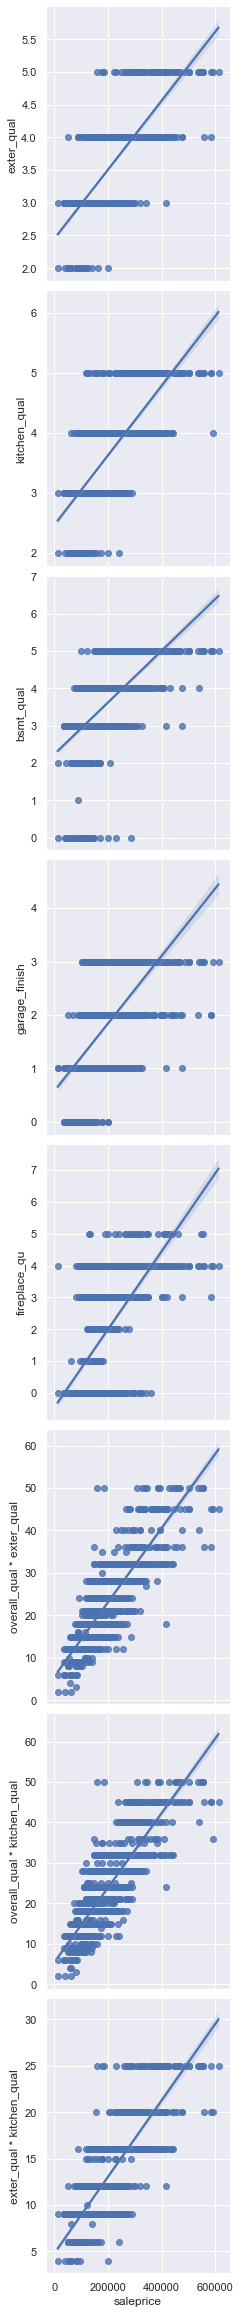

In [139]:
# Check linearity of variables to target
"""Set sns plot grid to darkgrid."""
sns.set(style="darkgrid")
"""Visualise linearity of variables to target."""
"""set pairplot kind to reg to display regression line."""
sns.pairplot(df, y_vars=['exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu',\
                         'overall_qual * exter_qual','overall_qual * kitchen_qual','exter_qual * kitchen_qual'],\
                         x_vars=['saleprice'], height=4, aspect=0.8, kind="reg");

Linear relation to `saleprice` observed for all variables.

Review of shortlisted predictors: `overall_qual`, `gr_liv_area`, `garage_area`, `total_bsmt_sf`, `year_built_aft1974`, `full_bath`,`mas_vnr_area`,`huge_gr_liv_area`,`huge_garage_area`,`huge_total_bsmt_sf`,`huge_mas_vnr_area`,`exter_qual`,`kitchen_qual`,`bsmt_qual`,`garage_finish`,`fireplace_qu`,`overall_qual * exter_qual`,`overall_qual * kitchen_qual`,`exter_qual * kitchen_qual`,`saleprice`.

### Modeling & Evaluation (Model 2)

In [140]:
# X and y variables for Model 2
"""Assign X2 to predictors for Model 2."""
X2 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
         'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','huge_mas_vnr_area',\
         'exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu','overall_qual * exter_qual',\
         'overall_qual * kitchen_qual','exter_qual * kitchen_qual']].values
"""Assign y2 to target for Model 2."""
y2 = df['saleprice'].values

In [141]:
# Instantiate model
model_2 = LinearRegression()
# Fit model
model_2.fit(X2, y2)
"""Predict saleprice based on shortlisted predictors."""
"""Assign prediction as y_pred_2"""
y_pred_2 = model_2.predict(X2)

In [142]:
# model_1 metrics
model_metrics(df['saleprice'],y_pred_1,X1.shape[1])

Mean squared error      =  1183024709.2469404
Root mean squared error =  34395.12624263706
R^2                     =  0.8116027626857274
Adjusted R^2            =  0.8105853991067107


In [143]:
# model_2 metrics
model_metrics(df['saleprice'],y_pred_2,X2.shape[1])

Mean squared error      =  888510727.356677
Root mean squared error =  29807.897063641994
R^2                     =  0.858504251813432
Adjusted R^2            =  0.8571792546643218


model_2 performs better than model_1; lowered `rmse` and increased `r2`, `r2 adjusted`.

In [144]:
# Model intercept and coefficients
print(f"model intercept : {round(model_2.intercept_,2)}.")
print(f"model coefficients : {model_2.coef_}.")

model intercept : 135870.92.
model coefficients : [-3.67118772e+04  4.80132890e+01  4.04799132e+01  2.64961423e+01
  5.21809362e+03 -2.15391952e+03  3.54670307e+01 -2.72501675e+05
 -3.48886101e+04 -5.99901464e+04 -3.97120934e+04 -2.53123082e+04
 -1.33710864e+04  3.85221001e+03  4.03103410e+03  3.17163294e+03
  7.27324612e+03  6.59007472e+03 -3.72063299e+03].


On interpretation of coefficients for the interaction columns, for example, `overall_qual` and `exter_qual`, one unit increase in `overall_qual` increases saleprice by -36_712 + 7_273`exter_qual`.

### Feature Engineering 4 (Categorical Nominal Variables)

We finally review nominal categorical variables. On paring down variables to considered, using insights from earlier EDA, `lot_area`, `yr_sold`, `misc_val` is not strongly correlated to `saleprice`. Hence, `lot_shape`, `lot_config`, `mo_sold` and `misc_feature` are not considered. `bldg_type` and `house_style` would be inferred from `gr_liv_area`. Variables related to exterior features of house (e.g. `roof_style`) is not considered.  The type of heating `heating` is not considered as `heating_qc` didn't surface as a strong correlation to `saleprice`.\
This leaves variables on housing location, accessibility and sale type.

In [145]:
# Define function to plot boxplot for the ordinal variables
"""Function plots column1 distribution by column2 ranges, title and xlabel."""
def boxplot_nom(column1,column2,title,xlabel):
    """set figure size 6 by 6."""
    df.boxplot(column=column1, by=column2,figsize = (6,6))
    """Customise title and xlabel."""
    plt.title(title, size=14)
    plt.xlabel(xlabel, size=14);

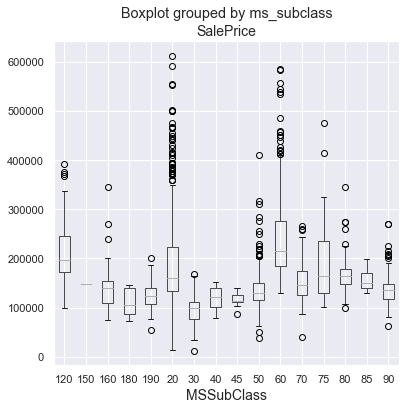

In [146]:
# Distribution of Saleprice by ms_subclass
boxplot_nom('saleprice','ms_subclass',"SalePrice","MSSubClass")

`120` and `60` classes have median saleprice higher than the rest of the other classes. `20` has significant number of outliers, it also has the widest range in saleprice. `45` has the smallest range in saleprice distribution.

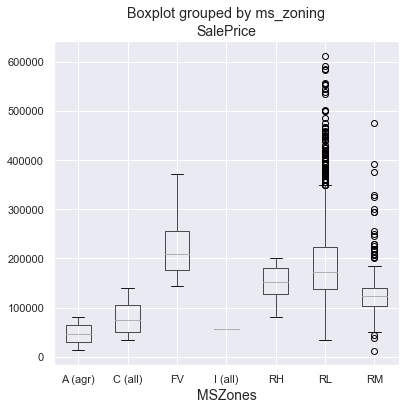

In [147]:
# Distribution of Saleprice by ms_zoning
boxplot_nom('saleprice','ms_zoning',"SalePrice","MSZones")

`FV` has a higher median saleprice than the other classes. `RL` has signiicant number of outliers. It could be that the houses with characteristics such as large living area are situated in `RL` (low residential density). There is a cluster in saleprice distribution consisting of `A(agr)`, `C(all)` and `I(all)`.

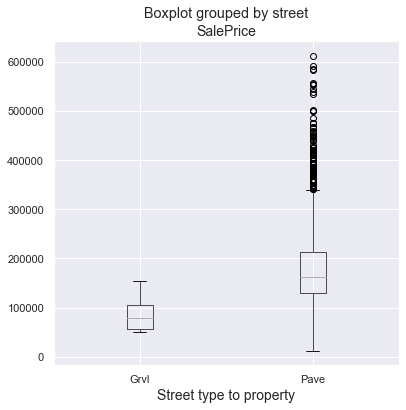

In [148]:
# Distribution of Saleprice by street
boxplot_nom('saleprice','street',"SalePrice","Street type to property")

Distinct variance in saleprice between those with `Grvl` (gravel) and `Pave` (pavement) types of access. `Pave` has a bigger range in saleprice disribution and also significant number of outliers.

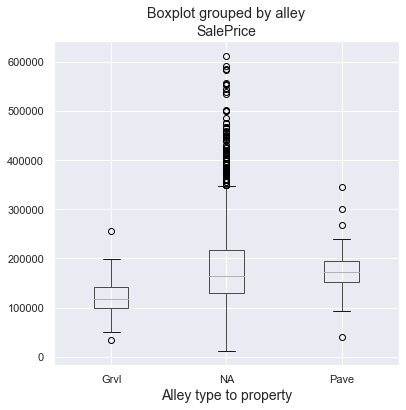

In [149]:
# Distribution of Saleprice by alley
boxplot_nom('saleprice','alley',"SalePrice","Alley type to property")

The median saleprice for the different alley types are fairly close to each other. Though there is some variance in the distribution of saleprice by different catergories of alley, it is not as significant compared to the boxplots of other variables.

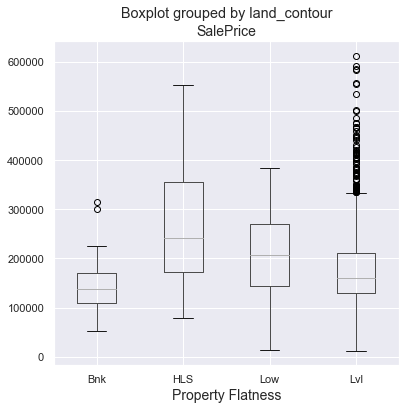

In [150]:
# Distribution of Saleprice by land_contour
boxplot_nom('saleprice','land_contour',"SalePrice","Property Flatness")

Median saleprice for `Bnk` is lower than all other classes. `HLS` has the highest median saleprice. Significant number of outliers in saleprice observed for `Lvl` class.

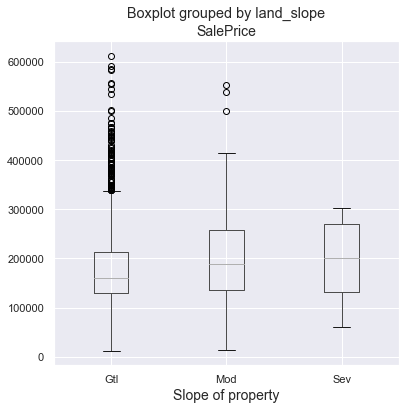

In [151]:
# Distribution of Saleprice by land_slope
boxplot_nom('saleprice','land_slope',"SalePrice","Slope of property")

The median saleprice for `Gtl` is slightly lower than that for `Mod` and `Sev`. `Gtl` has the largest spread in saleprice from aprox. 0 to upwards of 60_000.

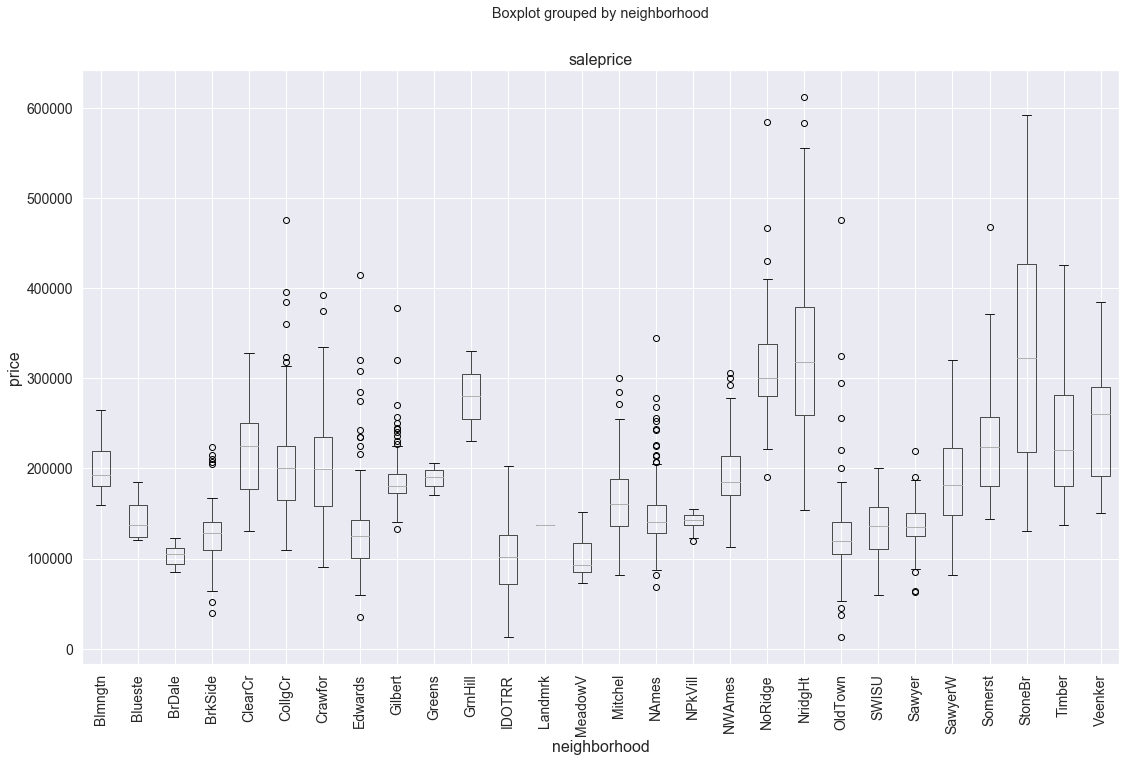

In [152]:
# Distribution of saleprice by neighborhood
df.boxplot(column='saleprice', by='neighborhood',figsize = (18,11))
plt.title("saleprice", size=16)
plt.ylabel("price", size=16)
plt.yticks(size=14)
plt.xlabel("neighborhood", size=16)
plt.xticks(rotation=90, size=14);

There is a variance in distribution of the saleprice for the different locations. Houses in `MeadowV` has the lowest median saleprice, while those in `StoneBr` has the highest median saleprice.

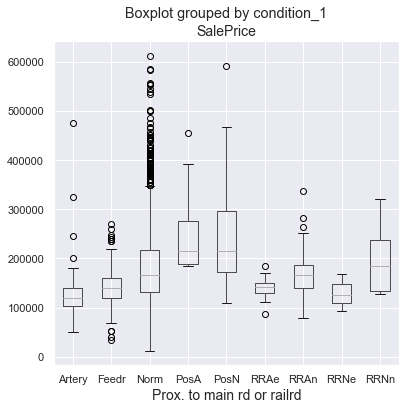

In [153]:
# Distribution of Saleprice by condition_1
boxplot_nom('saleprice','condition_1',"SalePrice","Prox. to main rd or railrd")

`PosA` and `PosN` has higher median saleprice than the rest of the other classes. `Norm` has the highest number of outliers in saleprice. The median saleprice for the rest of the classes are fairly consistent. 

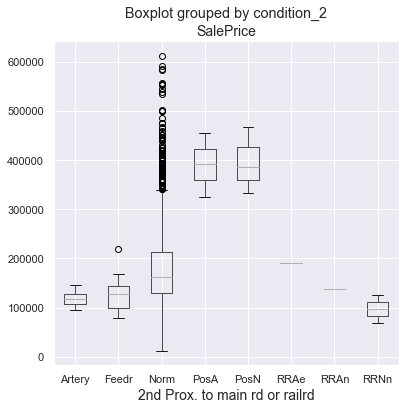

In [154]:
# Distribution of Saleprice by condition_2
boxplot_nom('saleprice','condition_2',"SalePrice","2nd Prox. to main rd or railrd")

There is a very distinct difference in median saleprice for `condition_2` road connectivity to the housing. In particular, those with `PosA` and `PosN` have the highest median saleprice (approx. 400_000 range). The lowest median saleprice comes from houses with `RRNn` road connectivity (100_000).

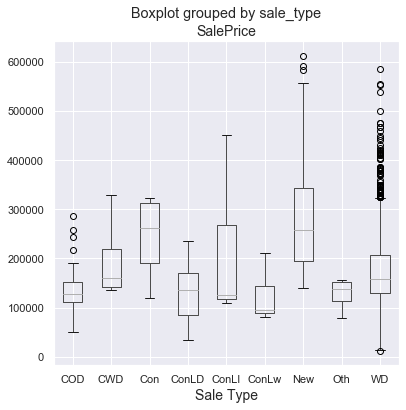

In [155]:
# Distribution of Saleprice by sale_type.
boxplot_nom('saleprice','sale_type',"SalePrice","Sale Type")

WD sale_type has significant number of outliers in saleprice. The median saleprice can be differentiated into two different clusters: one with Con and New sale type, with the remaining sale types forming another cluster.

model_2 has 19 predictor features. There is room for 11 more predictor features. Considering variables with more distinct difference saleprice distributions among variable classes, and feature budget, we select the following for feature engineering: `ms_zoning`, `street`, `sale_type`.

#### Feature Engineering for `ms_zoning`

In [156]:
# Check unique values for ms_zoning in train dataset
df['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [157]:
# Convert ms_zoning into dummy-encoded variables
d_mszone = pd.get_dummies(df[['ms_zoning']],drop_first=True)
"""Test dataset does not have 'C (all)' feature, drop encoded column 'ms_zoning_C (all)'."""
d_mszone.drop('ms_zoning_C (all)',axis=1,inplace=True)
"""Display first five rows of encoded feature."""
d_mszone.head()

,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


Note `A (agr)` has been dropped as reference category. Test dataset does not have the `A (agr)`. `ms_zoning_C (all)` will thus be dropped in feature encoding for test dataset. So we drop `ms_zoning_C (all)` for the train dataset. This ensures encoded features between train and test datasets matches.

#### Feature Engineering for `street`

In [158]:
# Check unique values for street in train dataset
df['street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [159]:
# Convert street into dummy-encoded variables
d_street = pd.get_dummies(df[['street']],drop_first=True)
"""Display first five rows of encoded feature."""
d_street.head()

,street_Pave
0,1
1,1
2,1
3,1
4,1


Note `Grvl` dropped as reference category.

#### Feature Engineering for `sale_type`

In [160]:
# Check unique values for sale_type in train dataset
df['sale_type'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI', 'ConLw'],
      dtype=object)

In [161]:
# Convert sale_type into dummy-coded variables
d_saletype = pd.get_dummies(df[['sale_type']],drop_first=True)
"""Display first five rows of encoded feature."""
d_saletype.head()

,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


Note that the 'COD' column has been dropped as reference category. Cross referencing back to the test dataset, need to drop this same column. At the same time, the train dataset does not have 'VWD' feature unlike the test dataset. Correspondingly this feature will need to be dropped during feature engineering for the test dataset.

In [162]:
# Add the encoded features to dataframe df
df = pd.concat([df, d_mszone], axis=1)
df = pd.concat([df, d_street], axis=1)
df = pd.concat([df, d_saletype], axis=1)
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,year_built_aft1974,year_remod/add_aft1993,huge_gr_liv_area,huge_garage_area,huge_total_bsmt_sf,huge_mas_vnr_area,y_pred_1,residuals,overall_qual * exter_qual,overall_qual * kitchen_qual,exter_qual * kitchen_qual,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,4,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,0,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,1,1,NA,0,3,2010,WD,130500,1,1,0,0,0,0,182334.973686,-51834.973686,24,24,16,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,4,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,0,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,1,1,NA,0,4,2009,WD,220000,1,1,0,0,0,0,238631.478689,-18631.478689,28,28,16,0,0,0,1,0,1,0,0,0,0,0,0,0,1


### Modeling & Evaluation (Model 3 & 4)

To keep within max. 30 features, we create two models based off model 2. Model 3 includes Model 2 variables, `ms_zoning` and `street` encoded features (total 25 features). Model 4 includes Model 2 variables, `street` and `sale_type` features (total 28 features).

In [163]:
# X and y variables for Model 3
"""Assign X3 to predictors for Model 3."""
X3 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
         'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','huge_mas_vnr_area',
         'exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu','overall_qual * exter_qual',\
         'overall_qual * kitchen_qual','exter_qual * kitchen_qual',\
         'ms_zoning_FV','ms_zoning_I (all)','ms_zoning_RH','ms_zoning_RL','ms_zoning_RM','street_Pave']].values
"""Assign y3 to target for Model 3."""
y3 = df['saleprice'].values

In [164]:
# Instantiate model
model_3 = LinearRegression()
# Fit model
model_3.fit(X3, y3)
"""Predict saleprice based on shortlisted predictors."""
"""Assign prediction as y_pred_3"""
y_pred_3 = model_3.predict(X3)

In [165]:
# Model 2 metrics
model_metrics(df['saleprice'],y_pred_2,X2.shape[1])

Mean squared error      =  888510727.356677
Root mean squared error =  29807.897063641994
R^2                     =  0.858504251813432
Adjusted R^2            =  0.8571792546643218


In [166]:
# Model 3 metrics
model_metrics(df['saleprice'],y_pred_3,X3.shape[1])

Mean squared error      =  860139130.2776319
Root mean squared error =  29328.12865284166
R^2                     =  0.8630224418952676
Adjusted R^2            =  0.8613296890763756


model_3 performs better than model_2; lowered `rmse` and increased `r2`, `r2 adjusted`. 

In [167]:
# X and y variables for Model 4
"""Assign X4 to predictors for Model 4."""
X4 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
         'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','huge_mas_vnr_area',
         'exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu','overall_qual * exter_qual',\
         'overall_qual * kitchen_qual','exter_qual * kitchen_qual',\
         'street_Pave',\
         'sale_type_CWD','sale_type_Con','sale_type_ConLD','sale_type_ConLI','sale_type_ConLw','sale_type_New',\
         'sale_type_Oth','sale_type_WD']].values
"""Assign y4 to target for Model 4."""
y4 = df['saleprice'].values

In [168]:
# Instantiate model
model_4 = LinearRegression()
# Fit model
model_4.fit(X4, y4)
"""Predict saleprice based on shortlisted predictors."""
"""Assign prediction as y_pred_3"""
y_pred_4 = model_4.predict(X4)

In [169]:
# Model 4 metrics
model_metrics(df['saleprice'],y_pred_4,X4.shape[1])

Mean squared error      =  866141314.7108032
Root mean squared error =  29430.2788758585
R^2                     =  0.8620665912218018
Adjusted R^2            =  0.8601546429813121


model_3 performs better than model_4 with a lower rmse, and higher r2 and r2 adjusted. We use model 3 as the baseline model to build our production model.

### Feature Engineering 5 (Test Data)

In [170]:
# Import cleaned test data
df_test = pd.read_csv('../datasets/test_Clean.csv',keep_default_na=False)
"""Display first five rows of data."""
df_test.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,1,2718,905108090,90,RL,68.0,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,4,625,535105100,20,RL,68.0,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [171]:
# No. of rows and columns of dataset
df_test.shape

(879, 81)

Predictors for Model 3 are: `overall_qual, gr_liv_area, garage_area, total_bsmt_sf, year_built_aft1974, full_bath, mas_vnr_area, huge_gr_liv_area,huge_garage_area,huge_total_bsmt_sf,huge mas_vnr_area`,`bsmt_qual`,`garage_finish`, `fireplace_qu`.

In [172]:
# Create dummy feature 'year_built_aft1974'
"""Median year 1974 from train dataset."""
df_test['year_built_aft1974'] = (df_test['year_built'] > 1974).astype(int)
# Review distribution of encoded feature
df_test['year_built_aft1974'].value_counts()

0    465
1    414
Name: year_built_aft1974, dtype: int64

In [173]:
# Create dummy feature huge_gr_liv_area
"""More than 3_750 sq ft : 1. less than or equal 3_750 sq ft : 0."""
df_test['huge_gr_liv_area'] = (df_test['gr_liv_area'] > 3_750).astype(int)
"""Review distribution of encoded variable"""
df_test['huge_gr_liv_area'].value_counts()

0    876
1      3
Name: huge_gr_liv_area, dtype: int64

In [174]:
# Create dummy feature huge_garage_area
"""More than 1_122 sq ft : 1. less than or equal 1_122 sq ft : 0."""
df_test['huge_garage_area'] = (df_test['garage_area'] > 1_122).astype(int)
"""Review distribution of encoded variable"""
df_test['huge_garage_area'].value_counts()

0    874
1      5
Name: huge_garage_area, dtype: int64

In [175]:
# Create dummy feature huge_total_bsmt_sf
"""More than 2_858 sq ft : 1. less than or equal 2_858 sq ft : 0."""
df_test['huge_total_bsmt_sf'] = (df_test['total_bsmt_sf'] > 2_858).astype(int)
"""Review distribution of encoded variable"""
df_test['huge_total_bsmt_sf'].value_counts()

0    878
1      1
Name: huge_total_bsmt_sf, dtype: int64

In [176]:
# Create dummy feature huge_mas_vnr_area
"""More than 974 sq ft : 1. less than or equal 974 sq ft : 0."""
df_test['huge_mas_vnr_area'] = (df_test['mas_vnr_area'] > 974).astype(int)
"""Review distribution of encoded variable"""
df_test['huge_mas_vnr_area'].value_counts()

0    873
1      6
Name: huge_mas_vnr_area, dtype: int64

In [177]:
# Ordinal encoding for exter_qual
# Data dict: Ex,Gd,TA,Fa,Po
"""Review counts of exter_qual classes."""
print(df_test['exter_qual'].value_counts())
"""Encoding classes in descending order."""
df_test['exter_qual'] = df_test['exter_qual'].map(ex_po_dict)
"""Review encoded classes."""
print(df_test['exter_qual'].value_counts())

TA    552
Gd    292
Ex     26
Fa      9
Name: exter_qual, dtype: int64
3    552
4    292
5     26
2      9
Name: exter_qual, dtype: int64


In [178]:
# Ordinal encoding for kitchen_qual
# Data dict: Ex,Gd,TA,Fa,Po
"""Review counts of kitch_qual classes."""
print(df_test['kitchen_qual'].value_counts())
"""Encoding classes in descending order."""
df_test['kitchen_qual'] = df_test['kitchen_qual'].map(ex_po_dict)
"""Review encoded classes."""
print(df_test['kitchen_qual'].value_counts())

TA    447
Gd    354
Ex     54
Fa     23
Po      1
Name: kitchen_qual, dtype: int64
3    447
4    354
5     54
2     23
1      1
Name: kitchen_qual, dtype: int64


In [179]:
# Ordinal encoding for bsmt_qual
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of exter_qual classes."""
print(df_test['bsmt_qual'].value_counts())
"""Encoding classes in descending order."""
df_test['bsmt_qual'] = df_test['bsmt_qual'].map(ex_na_dict)
"""Review encoded classes."""
print(df_test['bsmt_qual'].value_counts())

TA    396
Gd    355
Ex     74
Fa     28
NA     25
Po      1
Name: bsmt_qual, dtype: int64
3    396
4    355
5     74
2     28
0     25
1      1
Name: bsmt_qual, dtype: int64


In [180]:
# Ordinal encoding for garage_finish
# Data dict: Fin,RFn,Unf,NA
"""Review counts of garage_finish classes."""
print(df_test['garage_finish'].value_counts())
"""Encoding classes in descending order."""
df_test['garage_finish'] = df_test['garage_finish'].map(garfin_dict)
"""Review encoded classes."""
print(df_test['garage_finish'].value_counts())

Unf    382
RFn    233
Fin    219
NA      45
Name: garage_finish, dtype: int64
1    382
2    233
3    219
0     45
Name: garage_finish, dtype: int64


In [181]:
# Ordinal encoding for fireplace_qu
# Data dict: Ex,Gd,TA,Fa,Po,NA
"""Review counts of fireplace_qu classes."""
print(df_test['fireplace_qu'].value_counts())
"""Encoding classes in descending order."""
df_test['fireplace_qu'] = df_test['fireplace_qu'].map(ex_na_dict)
"""Review encoded classes."""
print(df_test['fireplace_qu'].value_counts())

NA    422
Gd    221
TA    193
Fa     16
Po     15
Ex     12
Name: fireplace_qu, dtype: int64
0    422
4    221
3    193
2     16
1     15
5     12
Name: fireplace_qu, dtype: int64


In [182]:
# Create Interaction columns
"""Between overall_qual and exter_qual."""
df_test['overall_qual * exter_qual'] = df_test['overall_qual'] * df_test['exter_qual']
"""Between overall_qual and kitchen_qual."""
df_test['overall_qual * kitchen_qual'] = df_test['overall_qual'] * df_test['kitchen_qual']
"""Between exter_qual and kitchen_qual."""
df_test['exter_qual * kitchen_qual'] = df_test['exter_qual'] * df_test['kitchen_qual']

#### Feature Engineering for `ms_zoning` (test dataset)

In [183]:
# Compare unique values for ms_zoning between train and test dataset
print(f"Unique ms_zoning values (train): {df['ms_zoning'].unique()}.")
print(f"Unique ms_zoning values (test): {df_test['ms_zoning'].unique()}.")

Unique ms_zoning values (train): ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)'].
Unique ms_zoning values (test): ['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)'].


In [184]:
# Convert ms_zoning into dummy-encoded variables
dtest_mszone = pd.get_dummies(df_test[['ms_zoning']],drop_first=True)
dtest_mszone.head()

,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0


In [185]:
dtest_mszone.shape

(879, 5)

Note `C (all)` has been dropped as reference category for test dataset.  Correspondingly, `C (all)` in train dataset dropped.

#### Feature Engineering for `street` (test dataset)

In [186]:
# Check unique values for street in train dataset
df_test['street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [187]:
# Convert street into dummy-encoded variables
dtest_street = pd.get_dummies(df_test[['street']],drop_first=True)
dtest_street.head()

,street_Pave
0,1
1,1
2,1
3,1
4,1


Note `Grvl` dropped as reference category.

In [188]:
# Add the encoded features to dataframe df_test
df_test = pd.concat([df_test, dtest_mszone], axis=1)
df_test = pd.concat([df_test, dtest_street], axis=1)
df_test.head(2)

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,year_built_aft1974,huge_gr_liv_area,huge_garage_area,huge_total_bsmt_sf,huge_mas_vnr_area,overall_qual * exter_qual,overall_qual * kitchen_qual,exter_qual * kitchen_qual,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,Fa,Stone,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,0,Detchd,1910.0,1,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,0,0,0,0,0,18,12,6,0,0,0,0,1,1
1,1,2718,905108090,90,RL,68.0,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,TA,CBlock,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,0,Attchd,1977.0,3,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,1,0,0,0,0,15,15,9,0,0,0,1,0,1


In [189]:
df_test.shape

(879, 95)

### Model Prep (Train/test split, Scaling)

In [190]:
# Split X3 and y3 variables into a training set and a holdout set
"""Use 80-20 for train-test split."""
"""Set random state seed as 42."""
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

In [191]:
# Review number of rows in train-split
X3_train.shape

(1639, 25)

In [192]:
# Scale features
"""Instantiate StandardScaler."""
ss = StandardScaler()
"""Fit to predictors in train set."""
ss.fit(X3_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [193]:
X3_train_sc = ss.transform(X3_train)
X3_test_sc = ss.transform(X3_test)

In [194]:
#Instantiate Linear regression
lr = LinearRegression()

In [195]:
#Instantiate LassoCV
"""Pass in 200 number of alphas along regularization path."""
lasso = LassoCV(n_alphas=200)

In [196]:
#Instantiate RidgeCV
"""Pass in 200 number of alphas along regularization path, from 0.1 to 10."""
ridge = RidgeCV(alphas=np.linspace(0.1,10,200))

In [197]:
# Define function for Cross validation
"""Set cross-validate 5 folds."""
"""Use cross_Val_Score to evaluate all three models."""
lr_scores = cross_val_score(lr, X3_train_sc, y3_train, cv=5)
lasso_scores = cross_val_score(lasso, X3_train_sc, y3_train, cv=5)
ridge_scores = cross_val_score(ridge, X3_train_sc, y3_train, cv=5)
"""Return mean of five R2 scores."""
print(f"Linear Regression R2: {round(lr_scores.mean(),9)}.")
print(f"Lasso (L1) Regression R2: {round(lasso_scores.mean(),9)}.")
print(f"Ridge (L2) Regression R2: {round(ridge_scores.mean(),9)}.")

Linear Regression R2: 0.817237074.
Lasso (L1) Regression R2: 0.81002364.
Ridge (L2) Regression R2: 0.817429023.


In [198]:
# Train and Test RMSE
ridge.fit(X3_train_sc, y3_train)
predictions_X3trainsc = ridge.predict(X3_train_sc)
train_mse = mean_squared_error(y3_train, predictions_X3trainsc)

predictions_X3testsc = ridge.predict(X3_test_sc)
test_mse = mean_squared_error(y3_test, predictions_X3testsc)
"""Print RMSE to 2 decimal places."""
print(f"Train RMSE: {round(np.sqrt(train_mse),2)}.")
print(f"Test RMSE: {round(np.sqrt(test_mse),2)}.")

Train RMSE: 29563.0.
Test RMSE: 30133.92.


In [199]:
# Train and Test R2 score
print(f"Train score: {ridge.score(X3_train_sc, y3_train)}.")
print(f"Test score: {ridge.score(X3_test_sc, y3_test)}.")

Train score: 0.8623258504581173.
Test score: 0.8486711169017641.


Ridge performs the best among the three models. The model is slightly overfitted, with higher test rmse compared to train rmse, and the test score is slightly lower than that of the train score. We note that the model is unable to fully account for all the variability in the data. We use Ridge model as the production model.

### Predicting SalePrice from Test Data

In [200]:
# X and y variables from whole train dataset
X_train = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
         'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','huge_mas_vnr_area',
         'exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu','overall_qual * exter_qual',\
         'overall_qual * kitchen_qual','exter_qual * kitchen_qual',\
         'ms_zoning_FV','ms_zoning_I (all)','ms_zoning_RH','ms_zoning_RL','ms_zoning_RM','street_Pave']]
y_train = df['saleprice']

In [201]:
# Review X_train shape
X_train.shape

(2049, 25)

In [202]:
# X and variables from whole test dataset
X_test = df_test[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
         'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','huge_mas_vnr_area',
         'exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu','overall_qual * exter_qual',\
         'overall_qual * kitchen_qual','exter_qual * kitchen_qual',\
         'ms_zoning_FV','ms_zoning_I (all)','ms_zoning_RH','ms_zoning_RL','ms_zoning_RM','street_Pave']]

In [203]:
# Review X_test shape
X_test.shape

(879, 25)

In [204]:
# Instantiate standard scaler.
ss = StandardScaler()
# Fit on Train set.
ss.fit(X_train)
# Scale X_train and X_test
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [205]:
# Fit Ridge (production model) to training data
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [206]:
# predict saleprice using test dataset
pred_saleprice = ridge.predict(X_test_sc)

In [207]:
pred_saleprice.shape

(879,)

In [208]:
df_pred_saleprice = pd.DataFrame(pred_saleprice)

In [209]:
df_pred_saleprice.head(5)

,0
0,136868.246599
1,207263.390654
2,198991.023158
3,104705.473035
4,185506.078489


In [210]:
# file should have header and format of id and SalePrice
df_kaggle1 = pd.DataFrame(df_test['id'])

In [211]:
df_kaggle1 = df_kaggle1.merge(df_pred_saleprice, left_index=True, right_index=True)

In [212]:
df_kaggle1.columns=['Id','SalePrice']

In [213]:
df_kaggle1.head()

,Id,SalePrice
0,2658,136868.246599
1,2718,207263.390654
2,2414,198991.023158
3,1989,104705.473035
4,625,185506.078489


In [214]:
# Save predicted saleprice
df_kaggle1.to_csv('../datasets/dfkaggle1.csv',index=False)

The rmse private score is 35240.04351, public score is 42488.03047 as reflected by Kaggle. 

---

### Business Recommendations

In [215]:
df_review = pd.concat([X_train, y_train], axis=1)

In [216]:
# Correlation with target
"""Return ascending correlation values per variable (numerical datatype)."""
"""Assign to cor_target."""
cor_target = (df_review.corr()['saleprice']).sort_values()
"""Return variables correlation."""
cor_target

ms_zoning_RM                  -0.280910
ms_zoning_I (all)             -0.034553
ms_zoning_RH                  -0.034201
huge_gr_liv_area               0.013522
street_Pave                    0.069921
huge_mas_vnr_area              0.081866
huge_total_bsmt_sf             0.088026
ms_zoning_FV                   0.106559
huge_garage_area               0.132986
ms_zoning_RL                   0.230429
mas_vnr_area                   0.503417
full_bath                      0.537913
fireplace_qu                   0.538615
garage_finish                  0.557806
year_built_aft1974             0.562243
bsmt_qual                      0.612414
total_bsmt_sf                  0.628894
garage_area                    0.650097
kitchen_qual                   0.692481
gr_liv_area                    0.697032
exter_qual                     0.712062
exter_qual * kitchen_qual      0.767556
overall_qual                   0.800028
overall_qual * exter_qual      0.828191
overall_qual * kitchen_qual    0.833388


Which features appear to add the most value to a home?
- The following features add the most value to the home: `overall quality`, `exterior quality`, `ground living area square feet`, `kitchen quality`, `kitchen quality`, `garage area`, `total basement area square feet`, `basement quality`, `housing built after 1974`, `garage finish`, `fireplace quality`, `number of full bathrooms` and `masonary veneer area square feet`.

 Which features hurt the value of a home the most?
 - Being located in residential zone (medium density) hurt the housing price the most.

What are things that homeowners could improve in their homes to increase the value?
- By focusing on the features that add the most value to their home, either refurnish existing housing features with better quality materials or fittings or by expanding the square feet area of their garage, basement, masonary veneer area, or increasing the number of full sized bathrooms.

What neighborhoods seem like they might be a good investment?
- From the saleprice distribution by neighborhood, housing in either Northridge Heights or StoneBrook might be a good investment (highest median saleprice and min. saleprice approx. 150_000 to max. saleprice 600_000).

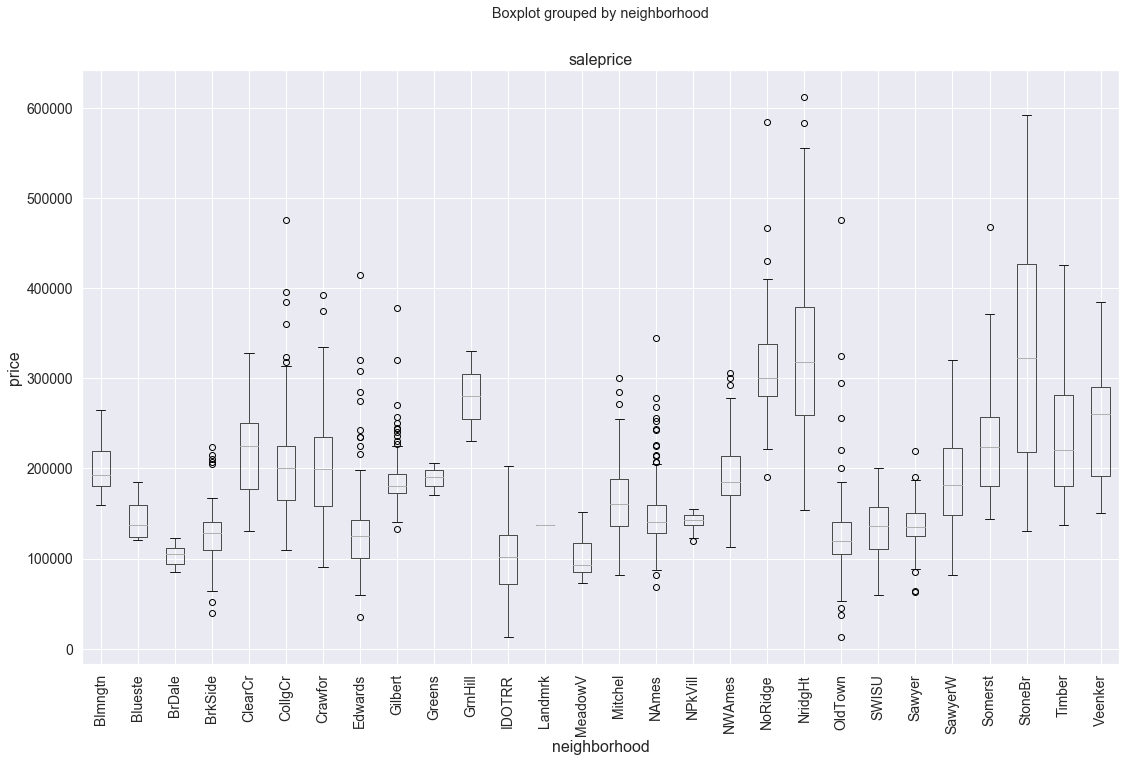

In [217]:
# Distribution of saleprice by neighborhood
df.boxplot(column='saleprice', by='neighborhood',figsize = (18,11))
plt.title("saleprice", size=16)
plt.ylabel("price", size=16)
plt.yticks(size=14)
plt.xlabel("neighborhood", size=16)
plt.xticks(rotation=90, size=14);

Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what data would you need from another city to make a comparable model?
- This model would not generalize as well to other cities, due to the features it has learnt that could be specific only to Ames City and not other cities. To enable the current model to generalize to other cities, I would need the data on variables that influence housing saleprice in other cities. This is to identify relevant features as predictors for the redevelopment of a regression model (using variables common across these cities) that can generalize across these cities. Also, I would drop variables that are not common across the cities to decrease model bias. 